In [2]:
%cd /content/drive/MyDrive/CV project/

/content/drive/MyDrive/CV project


In [3]:
pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 26.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 82.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 70.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 48.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 31.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling 

In [ ]:
import torch
from torchvision.transforms import functional as F
import os
import matplotlib.pyplot as plt
import json
import shutil
from pathlib import Path
from ultralytics import YOLO
import yaml
import torchvision.transforms as T
from sklearn.metrics import confusion_matrix

device = 'cuda' if torch.cuda.is_available() else 'cpu'
PROJECT_DIR = Path('/content')

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [5]:
# ---------------------------------------------
# 4. Detect dataset folder
# ---------------------------------------------
YOLO_DATA = None
for p in PROJECT_DIR.rglob('dataset'):
    if (p / 'images').is_dir() and (p / 'labels').is_dir() and (p / 'data.yaml').is_file():
        YOLO_DATA = p
        break
if YOLO_DATA is None:
    raise FileNotFoundError(f"Could not locate dataset under {PROJECT_DIR}")
print(f"Dataset folder: {YOLO_DATA}")
IMAGES_DIR = YOLO_DATA / 'images'
LABELS_DIR = YOLO_DATA / 'labels'

Dataset folder: /content/drive/MyDrive/CV project/dataset


In [6]:
# ---------------------------------------------
# 10. Train YOLOv8 models
# ---------------------------------------------
def train_model(data_yaml, run_name):
    model = YOLO('yolov8s.pt')
    return model.train(
        data=str(YOLO_DATA / data_yaml),
        epochs=300,
        imgsz=640,
        batch=8,
        device=device,
        name=run_name,
        workers=min(os.cpu_count(), 16),
        patience=300,
        augment=True,
        mosaic=1.0,
        mixup=0.0,
        hsv_h=0.015,
        hsv_s=0.7,
        hsv_v=0.4,
        fliplr=0.5,
        degrees=10.0,
        translate=0.1,
        scale=0.7,
        flipud=0.0
    )

In [24]:
print("Training RGB-only model...")
yolo_model = train_model('data.yaml', 'yolov8_rgb')

Training RGB-only model...
Ultralytics 8.3.127 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=True, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/CV project/dataset/data.yaml, degrees=10.0, deterministic=True, device=cuda:0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=300, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=yolov8_rgb7, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patien

100%|██████████| 755k/755k [00:00<00:00, 24.7MB/s]

Overriding model.yaml nc=80 with nc=6

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.block.C2f             [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytics

 22        [15, 18, 21]  1   2118370  ultralytics.nn.modules.head.Detect           [6, [128, 256, 512]]          
Model summary: 129 layers, 11,137,922 parameters, 11,137,906 gradients, 28.7 GFLOPs

Transferred 349/355 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...


100%|██████████| 5.35M/5.35M [00:00<00:00, 96.9MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.4±0.1 ms, read: 0.4±0.1 MB/s, size: 156.0 KB)


train: Scanning /content/drive/MyDrive/CV project/dataset/labels/train... 403 images, 0 backgrounds, 0 corrupt: 100%|██████████| 403/403 [02:31<00:00,  2.66it/s]

train: New cache created: /content/drive/MyDrive/CV project/dataset/labels/train.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 1.7±2.4 ms, read: 0.4±0.1 MB/s, size: 167.6 KB)


val: Scanning /content/drive/MyDrive/CV project/dataset/labels/val... 53 images, 0 backgrounds, 0 corrupt: 100%|██████████| 53/53 [00:42<00:00,  1.24it/s]

val: New cache created: /content/drive/MyDrive/CV project/dataset/labels/val.cache


Plotting labels to runs/detect/yolov8_rgb7/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/yolov8_rgb7
Starting training for 300 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/300      1.92G      1.759      3.749      1.454         23        640: 100%|██████████| 51/51 [00:13<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.26it/s]

                   all         53        301      0.225       0.51      0.267      0.155



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/300      2.05G       1.37      2.115       1.22         32        640: 100%|██████████| 51/51 [00:11<00:00,  4.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.77it/s]

                   all         53        301        0.3      0.483      0.334        0.2



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/300      2.09G       1.33      1.922      1.196         47        640: 100%|██████████| 51/51 [00:15<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.70it/s]

                   all         53        301      0.388      0.466      0.421      0.221



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/300      2.13G      1.296      1.719      1.171         40        640: 100%|██████████| 51/51 [00:15<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.55it/s]

                   all         53        301      0.451      0.566      0.498      0.331



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/300      2.16G      1.235      1.596      1.159         59        640: 100%|██████████| 51/51 [00:15<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.80it/s]

                   all         53        301      0.488      0.641      0.556       0.37



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/300      2.23G      1.206      1.472      1.157         35        640: 100%|██████████| 51/51 [00:15<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.40it/s]

                   all         53        301      0.435      0.617      0.579      0.387



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/300      2.31G      1.185      1.406      1.134         42        640: 100%|██████████| 51/51 [00:15<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.87it/s]

                   all         53        301      0.588      0.621      0.609      0.379



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/300      2.35G      1.143      1.339      1.131         52        640: 100%|██████████| 51/51 [00:13<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.37it/s]

                   all         53        301      0.568      0.642      0.639      0.474



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/300       2.4G      1.119      1.251        1.1         33        640: 100%|██████████| 51/51 [00:17<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.59it/s]

                   all         53        301      0.573      0.635      0.608       0.44



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/300      2.52G      1.091      1.212      1.106         39        640: 100%|██████████| 51/51 [00:12<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.69it/s]

                   all         53        301      0.622      0.669      0.659      0.468



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/300      2.55G      1.122      1.239      1.116         41        640: 100%|██████████| 51/51 [00:13<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.17it/s]

                   all         53        301      0.606      0.666      0.675      0.436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/300      2.59G      1.094      1.204      1.103         35        640: 100%|██████████| 51/51 [00:12<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.01it/s]

                   all         53        301       0.66      0.694      0.709      0.488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/300      2.71G      1.086      1.187       1.09         50        640: 100%|██████████| 51/51 [00:14<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.85it/s]

                   all         53        301      0.618      0.665      0.702      0.494



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/300      2.75G       1.07      1.129      1.079         19        640: 100%|██████████| 51/51 [00:14<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.39it/s]

                   all         53        301      0.638      0.704       0.69      0.485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/300      2.82G      1.035      1.102      1.078         28        640: 100%|██████████| 51/51 [00:13<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.68it/s]

                   all         53        301      0.717      0.653      0.731      0.498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/300      2.89G      1.052      1.112      1.094         56        640: 100%|██████████| 51/51 [00:14<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.87it/s]

                   all         53        301      0.703      0.693      0.735      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/300      2.96G      1.033       1.07      1.063         54        640: 100%|██████████| 51/51 [00:15<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.96it/s]

                   all         53        301      0.639      0.725      0.698      0.535



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/300         3G      1.024      1.042      1.066         28        640: 100%|██████████| 51/51 [00:14<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.97it/s]

                   all         53        301      0.644      0.779      0.713      0.494



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/300      3.07G      1.026      1.055      1.056         33        640: 100%|██████████| 51/51 [00:13<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.12it/s]

                   all         53        301      0.675      0.722      0.708      0.494



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/300      3.14G       1.02       1.07      1.084         21        640: 100%|██████████| 51/51 [00:13<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.33it/s]

                   all         53        301        0.6      0.743      0.713       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/300       3.2G     0.9935       1.03      1.061         28        640: 100%|██████████| 51/51 [00:15<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.68it/s]

                   all         53        301      0.685      0.737       0.76      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/300      3.27G     0.9973      1.018      1.044         39        640: 100%|██████████| 51/51 [00:15<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.42it/s]

                   all         53        301      0.647      0.747      0.714      0.541



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/300      3.34G      0.981     0.9881      1.042         55        640: 100%|██████████| 51/51 [00:16<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.36it/s]


                   all         53        301      0.692      0.689      0.717      0.538

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/300      3.41G     0.9924      1.002       1.05         28        640: 100%|██████████| 51/51 [00:15<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.26it/s]

                   all         53        301      0.687      0.746      0.744      0.538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/300      3.46G     0.9777     0.9625       1.05         41        640: 100%|██████████| 51/51 [00:15<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.37it/s]

                   all         53        301      0.751      0.707      0.776      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/300      3.51G      1.006     0.9751      1.055         41        640: 100%|██████████| 51/51 [00:15<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.54it/s]

                   all         53        301       0.69      0.722      0.761      0.552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/300      3.64G     0.9777     0.9683      1.051         56        640: 100%|██████████| 51/51 [00:13<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.41it/s]

                   all         53        301      0.703      0.727      0.771      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/300      3.68G     0.9678     0.9558      1.028         55        640: 100%|██████████| 51/51 [00:15<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.22it/s]

                   all         53        301      0.653      0.797      0.757      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/300      3.76G     0.9446     0.9178      1.025         40        640: 100%|██████████| 51/51 [00:13<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.53it/s]

                   all         53        301      0.686      0.774      0.755      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/300      3.83G     0.9294     0.9152      1.024         45        640: 100%|██████████| 51/51 [00:13<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.46it/s]

                   all         53        301      0.672      0.758      0.736       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/300      3.87G     0.9529     0.9441      1.035         41        640: 100%|██████████| 51/51 [00:13<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.48it/s]

                   all         53        301      0.657      0.786       0.75      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/300      3.91G     0.9586     0.9188      1.039         17        640: 100%|██████████| 51/51 [00:13<00:00,  3.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.38it/s]

                   all         53        301      0.713      0.795      0.775      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/300      3.96G     0.9614     0.9342      1.028         45        640: 100%|██████████| 51/51 [00:13<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.28it/s]

                   all         53        301      0.715      0.741      0.778      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/300      4.06G     0.9489     0.9175      1.043         34        640: 100%|██████████| 51/51 [00:14<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.50it/s]

                   all         53        301      0.693      0.756      0.759      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/300      4.19G     0.9486     0.9535      1.025         21        640: 100%|██████████| 51/51 [00:13<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.58it/s]

                   all         53        301      0.732      0.748       0.78      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/300      4.22G     0.9319     0.9356      1.027         49        640: 100%|██████████| 51/51 [00:15<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.20it/s]

                   all         53        301      0.722      0.773      0.796      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/300      4.26G     0.9125     0.8828      1.018         32        640: 100%|██████████| 51/51 [00:12<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.62it/s]

                   all         53        301      0.747      0.759      0.781      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/300      4.34G     0.9391     0.9195      1.043         27        640: 100%|██████████| 51/51 [00:14<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.41it/s]

                   all         53        301      0.621      0.777      0.729      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/300      4.38G     0.9911      0.923      1.036         37        640: 100%|██████████| 51/51 [00:14<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.78it/s]

                   all         53        301      0.698      0.776      0.794      0.619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/300      4.45G     0.9448     0.8972      1.027         32        640: 100%|██████████| 51/51 [00:15<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.15it/s]

                   all         53        301      0.764      0.773        0.8      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/300      4.48G     0.8995     0.8515      1.006         22        640: 100%|██████████| 51/51 [00:15<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.92it/s]

                   all         53        301      0.738      0.756      0.786      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/300       4.6G     0.8925     0.8344      1.022         13        640: 100%|██████████| 51/51 [00:13<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.05it/s]

                   all         53        301      0.715      0.751      0.767      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/300      4.69G     0.9018     0.8582      1.009         30        640: 100%|██████████| 51/51 [00:13<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.42it/s]

                   all         53        301      0.673      0.807      0.774       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/300      4.72G     0.8485     0.8152     0.9996         15        640: 100%|██████████| 51/51 [00:13<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.44it/s]

                   all         53        301      0.748      0.752      0.771      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/300      4.76G     0.8993     0.8409     0.9977         47        640: 100%|██████████| 51/51 [00:13<00:00,  3.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.12it/s]

                   all         53        301      0.707      0.759      0.767      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/300      4.83G     0.9006     0.8447      1.003         36        640: 100%|██████████| 51/51 [00:13<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.92it/s]

                   all         53        301      0.675      0.783      0.769      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/300      4.89G     0.8926     0.8388      1.005         31        640: 100%|██████████| 51/51 [00:13<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.31it/s]

                   all         53        301      0.695      0.752      0.774      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/300      4.93G      0.871     0.8494      1.001         17        640: 100%|██████████| 51/51 [00:13<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.43it/s]

                   all         53        301      0.674      0.777      0.781      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/300      4.99G     0.8701     0.8297     0.9978         25        640: 100%|██████████| 51/51 [00:13<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.61it/s]

                   all         53        301      0.687      0.782       0.76      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/300      5.09G     0.8714     0.8354      1.001         46        640: 100%|██████████| 51/51 [00:13<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.04it/s]

                   all         53        301      0.739      0.782      0.804      0.635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/300      5.16G     0.8627     0.8257      1.003         32        640: 100%|██████████| 51/51 [00:15<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.10it/s]

                   all         53        301      0.753      0.826      0.814      0.636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/300      5.23G     0.8456     0.7981     0.9924         44        640: 100%|██████████| 51/51 [00:15<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.24it/s]

                   all         53        301      0.761      0.758      0.801      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/300       5.3G     0.8589      0.825     0.9944         30        640: 100%|██████████| 51/51 [00:15<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.03it/s]

                   all         53        301       0.77      0.767       0.81      0.652



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/300      5.34G      0.868     0.8026      1.006         21        640: 100%|██████████| 51/51 [00:15<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.53it/s]

                   all         53        301      0.768       0.76      0.814      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/300      5.43G     0.8538     0.7918     0.9934         26        640: 100%|██████████| 51/51 [00:13<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.25it/s]

                   all         53        301      0.716      0.766      0.774      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/300      5.47G     0.8457     0.7923     0.9929         31        640: 100%|██████████| 51/51 [00:13<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.45it/s]

                   all         53        301      0.718      0.737      0.765      0.612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/300      5.53G     0.8448     0.7916     0.9969         20        640: 100%|██████████| 51/51 [00:13<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.97it/s]

                   all         53        301      0.743      0.793      0.778      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/300       5.6G     0.8353     0.7888      0.993         13        640: 100%|██████████| 51/51 [00:13<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.40it/s]

                   all         53        301      0.748      0.785      0.787      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/300      5.67G     0.8409     0.7777     0.9867         30        640: 100%|██████████| 51/51 [00:13<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.43it/s]

                   all         53        301       0.72      0.768      0.764      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/300      5.74G     0.8335     0.7739     0.9749         27        640: 100%|██████████| 51/51 [00:13<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.12it/s]

                   all         53        301      0.769      0.785      0.811      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/300       5.8G     0.8168     0.7749     0.9833         21        640: 100%|██████████| 51/51 [00:14<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.15it/s]

                   all         53        301      0.745      0.789       0.81      0.664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/300      5.87G     0.8496     0.7765     0.9898         33        640: 100%|██████████| 51/51 [00:15<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.67it/s]

                   all         53        301      0.725      0.767      0.802      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/300      5.98G     0.8617     0.7619     0.9971         26        640: 100%|██████████| 51/51 [00:13<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.02it/s]

                   all         53        301       0.74      0.785      0.807      0.652



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/300      6.02G     0.8689     0.7735     0.9858         19        640: 100%|██████████| 51/51 [00:13<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.43it/s]

                   all         53        301      0.683      0.849      0.814      0.657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/300      6.08G     0.8164       0.73     0.9761         35        640: 100%|██████████| 51/51 [00:13<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.50it/s]

                   all         53        301       0.72      0.821      0.793      0.651



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/300      6.16G     0.8235     0.7293     0.9881         19        640: 100%|██████████| 51/51 [00:13<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.19it/s]


                   all         53        301      0.691      0.823      0.797       0.64

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/300       6.2G     0.8387     0.7595     0.9824         39        640: 100%|██████████| 51/51 [00:13<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.96it/s]


                   all         53        301      0.681      0.819      0.789      0.642

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/300      6.26G     0.8123     0.7465     0.9872         24        640: 100%|██████████| 51/51 [00:15<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.76it/s]


                   all         53        301      0.721      0.787      0.803      0.647

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/300      6.33G     0.8208     0.7324     0.9777         30        640: 100%|██████████| 51/51 [00:13<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.22it/s]


                   all         53        301      0.726      0.769      0.783      0.634

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/300       6.4G     0.8125     0.7503     0.9652         54        640: 100%|██████████| 51/51 [00:13<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.84it/s]

                   all         53        301       0.72      0.804      0.798      0.617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/300      6.47G     0.8134     0.7408     0.9841         30        640: 100%|██████████| 51/51 [00:13<00:00,  3.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.66it/s]

                   all         53        301      0.753        0.8      0.805      0.628



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/300      6.54G     0.8057     0.7535     0.9751         20        640: 100%|██████████| 51/51 [00:13<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.58it/s]

                   all         53        301      0.734      0.805      0.802      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/300      6.57G     0.8254     0.7683     0.9771         48        640: 100%|██████████| 51/51 [00:13<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.66it/s]

                   all         53        301      0.691      0.794      0.808      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/300      6.64G     0.8209     0.7545     0.9738         21        640: 100%|██████████| 51/51 [00:13<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.88it/s]

                   all         53        301      0.752      0.753      0.795      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/300      6.73G     0.7975      0.714     0.9767         33        640: 100%|██████████| 51/51 [00:13<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.59it/s]

                   all         53        301      0.783      0.751      0.805      0.651



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/300      6.81G     0.8324     0.7549     0.9941         39        640: 100%|██████████| 51/51 [00:13<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.31it/s]

                   all         53        301      0.719      0.805      0.822      0.662



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/300      6.84G     0.7794     0.7116     0.9603         32        640: 100%|██████████| 51/51 [00:13<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.45it/s]

                   all         53        301      0.697      0.831      0.806      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/300      6.91G     0.7861     0.7131     0.9657         18        640: 100%|██████████| 51/51 [00:13<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.45it/s]

                   all         53        301      0.714      0.795      0.792      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/300      7.02G     0.7866      0.724     0.9667         39        640: 100%|██████████| 51/51 [00:13<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.19it/s]

                   all         53        301      0.762      0.799      0.819      0.666



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/300      7.06G     0.7906     0.7198     0.9774         32        640: 100%|██████████| 51/51 [00:15<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.29it/s]

                   all         53        301      0.727      0.799      0.798      0.652



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/300      7.12G     0.7769     0.7044     0.9672         25        640: 100%|██████████| 51/51 [00:13<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.72it/s]

                   all         53        301      0.688      0.802      0.798      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/300       7.2G     0.7937     0.7055     0.9605         45        640: 100%|██████████| 51/51 [00:13<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.89it/s]

                   all         53        301      0.724      0.793      0.806      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/300      7.24G      0.771     0.6905     0.9625         40        640: 100%|██████████| 51/51 [00:15<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.72it/s]

                   all         53        301      0.773      0.761      0.809      0.664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/300      7.34G     0.7748      0.712     0.9603         57        640: 100%|██████████| 51/51 [00:13<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.06it/s]

                   all         53        301      0.723      0.803      0.798      0.653



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/300      7.42G     0.7855      0.716      0.965         47        640: 100%|██████████| 51/51 [00:13<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.35it/s]

                   all         53        301       0.71      0.807      0.796      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/300      2.45G     0.7793     0.6774     0.9616         16        640: 100%|██████████| 51/51 [00:13<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.15it/s]

                   all         53        301       0.75      0.804      0.824      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/300      2.54G      0.765     0.6649     0.9487         37        640: 100%|██████████| 51/51 [00:15<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.04it/s]


                   all         53        301      0.747      0.762      0.794      0.643

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/300      2.54G     0.7601     0.6847     0.9513         18        640: 100%|██████████| 51/51 [00:12<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.18it/s]


                   all         53        301      0.743      0.787      0.806      0.662

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/300      2.54G     0.7655     0.6814      0.951         41        640: 100%|██████████| 51/51 [00:12<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.77it/s]

                   all         53        301      0.766      0.777      0.828      0.677



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/300      2.54G      0.763     0.6873     0.9593         36        640: 100%|██████████| 51/51 [00:12<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.62it/s]


                   all         53        301      0.731      0.759      0.785      0.638

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/300      2.54G     0.7678     0.6926     0.9569         50        640: 100%|██████████| 51/51 [00:12<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.76it/s]

                   all         53        301      0.715      0.793      0.811      0.656



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/300      2.58G     0.7631     0.6746     0.9564         23        640: 100%|██████████| 51/51 [00:12<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.51it/s]

                   all         53        301      0.715      0.849       0.83      0.669



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/300      2.58G     0.7821     0.6894     0.9662         21        640: 100%|██████████| 51/51 [00:12<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.11it/s]

                   all         53        301      0.747      0.774      0.819      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/300      2.58G     0.7584     0.6617     0.9483         28        640: 100%|██████████| 51/51 [00:12<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.94it/s]

                   all         53        301       0.71       0.85      0.813      0.673



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/300      2.62G     0.7511     0.6718     0.9539         37        640: 100%|██████████| 51/51 [00:12<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.92it/s]

                   all         53        301      0.735      0.787      0.815      0.676



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/300      2.69G     0.7519      0.672      0.947         34        640: 100%|██████████| 51/51 [00:12<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.28it/s]

                   all         53        301      0.736      0.826      0.838      0.689



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/300      2.69G     0.7354     0.6657     0.9478         34        640: 100%|██████████| 51/51 [00:15<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.32it/s]

                   all         53        301      0.743      0.821      0.831      0.687



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/300      2.69G     0.7624     0.6606     0.9532         51        640: 100%|██████████| 51/51 [00:13<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.13it/s]


                   all         53        301      0.754      0.754      0.815      0.664

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/300      2.72G     0.7649      0.671      0.963         36        640: 100%|██████████| 51/51 [00:13<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.25it/s]

                   all         53        301      0.747      0.813      0.832      0.694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/300      2.79G     0.7195     0.6489     0.9412         41        640: 100%|██████████| 51/51 [00:15<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.87it/s]

                   all         53        301      0.747       0.79      0.836      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/300      2.86G     0.7463     0.6448     0.9486         59        640: 100%|██████████| 51/51 [00:14<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.08it/s]

                   all         53        301      0.735      0.809      0.827      0.686



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/300       2.9G     0.7427     0.6606     0.9437         38        640: 100%|██████████| 51/51 [00:13<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.54it/s]

                   all         53        301       0.71      0.844      0.825      0.686



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/300         3G     0.7376     0.6634     0.9495         68        640: 100%|██████████| 51/51 [00:14<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.60it/s]

                   all         53        301      0.751      0.792      0.833      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/300      3.09G      0.743     0.6522      0.961         17        640: 100%|██████████| 51/51 [00:13<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.93it/s]

                   all         53        301      0.763      0.813      0.829      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/300      3.12G     0.7273     0.6311      0.956         19        640: 100%|██████████| 51/51 [00:13<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.83it/s]

                   all         53        301      0.761      0.776      0.824      0.685



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/300      3.16G     0.7433      0.669     0.9532         41        640: 100%|██████████| 51/51 [00:19<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.13it/s]

                   all         53        301      0.722      0.835      0.836      0.699



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/300      3.23G     0.7348     0.6551     0.9411         32        640: 100%|██████████| 51/51 [00:14<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.26it/s]

                   all         53        301       0.76      0.773      0.823      0.688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/300       3.3G     0.7196     0.6298     0.9322         37        640: 100%|██████████| 51/51 [00:13<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.00it/s]

                   all         53        301      0.745      0.841      0.833      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/300      3.41G     0.7284     0.6245     0.9426         39        640: 100%|██████████| 51/51 [00:13<00:00,  3.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.06it/s]

                   all         53        301      0.731      0.818      0.832      0.693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/300      3.45G     0.7255      0.656     0.9383         18        640: 100%|██████████| 51/51 [00:13<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.22it/s]

                   all         53        301       0.75      0.804      0.816      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/300      3.48G     0.7129     0.6171      0.933         51        640: 100%|██████████| 51/51 [00:14<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.89it/s]

                   all         53        301       0.73      0.839      0.815      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/300      3.58G      0.721     0.6548     0.9465         24        640: 100%|██████████| 51/51 [00:13<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.85it/s]

                   all         53        301      0.768      0.766      0.806       0.67



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/300      3.64G       0.74     0.6306     0.9346         30        640: 100%|██████████| 51/51 [00:14<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.53it/s]

                   all         53        301      0.753      0.808      0.827      0.689



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/300      3.69G     0.7183     0.6438     0.9351         56        640: 100%|██████████| 51/51 [00:13<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.90it/s]

                   all         53        301      0.744      0.809      0.823      0.685



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/300      3.76G     0.7175     0.6242     0.9381         53        640: 100%|██████████| 51/51 [00:13<00:00,  3.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.51it/s]

                   all         53        301      0.743      0.834      0.835      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/300      3.84G      0.705     0.6217      0.939         29        640: 100%|██████████| 51/51 [00:13<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.64it/s]

                   all         53        301       0.71      0.834      0.824      0.689



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/300      3.91G     0.7228     0.6265     0.9336         46        640: 100%|██████████| 51/51 [00:13<00:00,  3.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.94it/s]

                   all         53        301      0.783       0.79      0.824      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/300      3.95G     0.7084     0.6228     0.9397         18        640: 100%|██████████| 51/51 [00:15<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.64it/s]

                   all         53        301      0.722      0.821      0.826      0.696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/300      4.05G     0.7215      0.613     0.9375         30        640: 100%|██████████| 51/51 [00:13<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.97it/s]

                   all         53        301      0.732      0.846      0.823      0.686



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/300      4.09G     0.7037     0.5949     0.9293         30        640: 100%|██████████| 51/51 [00:13<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.03it/s]


                   all         53        301      0.694      0.842      0.816      0.689

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/300      4.16G     0.7087     0.6041     0.9282         36        640: 100%|██████████| 51/51 [00:13<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.49it/s]

                   all         53        301      0.752      0.806      0.832      0.704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/300      4.23G      0.736     0.6173     0.9373         34        640: 100%|██████████| 51/51 [00:15<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.57it/s]

                   all         53        301      0.789      0.809      0.833      0.713



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/300      4.31G     0.6973     0.6032     0.9269         24        640: 100%|██████████| 51/51 [00:15<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.62it/s]

                   all         53        301      0.778      0.806      0.844      0.725



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/300      4.34G     0.7061     0.6165     0.9381         46        640: 100%|██████████| 51/51 [00:15<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.69it/s]

                   all         53        301      0.727      0.843      0.829        0.7



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/300      4.41G     0.7118     0.6066     0.9317         34        640: 100%|██████████| 51/51 [00:14<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.80it/s]

                   all         53        301      0.737      0.814      0.826      0.694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/300      4.49G     0.7198     0.6092     0.9332         22        640: 100%|██████████| 51/51 [00:14<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.16it/s]

                   all         53        301      0.763      0.832       0.83      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/300      4.56G     0.6954     0.6014     0.9301         14        640: 100%|██████████| 51/51 [00:13<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.19it/s]

                   all         53        301      0.742      0.818      0.826      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/300       4.6G     0.6839     0.5934     0.9253         44        640: 100%|██████████| 51/51 [00:13<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.63it/s]

                   all         53        301      0.771      0.811       0.83        0.7



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/300      4.69G      0.702     0.6068     0.9377         44        640: 100%|██████████| 51/51 [00:13<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.79it/s]

                   all         53        301      0.739      0.839       0.83      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/300      4.78G     0.6828     0.5967     0.9172         39        640: 100%|██████████| 51/51 [00:13<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.79it/s]

                   all         53        301      0.761      0.836       0.84      0.716



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/300      4.82G     0.6795      0.584     0.9326         25        640: 100%|██████████| 51/51 [00:13<00:00,  3.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.08it/s]

                   all         53        301      0.768      0.835      0.841      0.714



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/300      4.86G      0.693     0.5977     0.9336         15        640: 100%|██████████| 51/51 [00:13<00:00,  3.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.94it/s]


                   all         53        301      0.727      0.819      0.817      0.682

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/300      4.95G     0.6844     0.6066     0.9183         48        640: 100%|██████████| 51/51 [00:13<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.58it/s]


                   all         53        301      0.742      0.829      0.829      0.698

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    134/300      4.99G     0.6839     0.5872     0.9211         39        640: 100%|██████████| 51/51 [00:13<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.43it/s]

                   all         53        301      0.765      0.831      0.828      0.692



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    135/300      5.08G     0.6976     0.6044     0.9333         46        640: 100%|██████████| 51/51 [00:13<00:00,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.09it/s]

                   all         53        301      0.792      0.776      0.823      0.689



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    136/300      5.12G     0.6871     0.5967     0.9324         26        640: 100%|██████████| 51/51 [00:13<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.53it/s]


                   all         53        301      0.728      0.826      0.818      0.685

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    137/300      5.18G     0.6812     0.5709     0.9178         37        640: 100%|██████████| 51/51 [00:13<00:00,  3.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.04it/s]

                   all         53        301       0.77      0.799      0.822      0.685



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    138/300      5.25G     0.6786     0.5786     0.9194         30        640: 100%|██████████| 51/51 [00:12<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.80it/s]

                   all         53        301      0.767      0.802      0.823      0.692



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    139/300      5.39G     0.6764     0.5754     0.9153         20        640: 100%|██████████| 51/51 [00:13<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.02it/s]

                   all         53        301      0.775      0.816      0.833      0.712



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    140/300      5.42G     0.6671     0.5757     0.9273         62        640: 100%|██████████| 51/51 [00:15<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.94it/s]

                   all         53        301      0.759      0.838      0.828      0.699



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    141/300       5.5G     0.6516      0.575     0.9168         62        640: 100%|██████████| 51/51 [00:13<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.32it/s]

                   all         53        301      0.791      0.783      0.818      0.685



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    142/300      5.54G     0.6571     0.5751     0.9176         26        640: 100%|██████████| 51/51 [00:13<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.08it/s]

                   all         53        301      0.747       0.81      0.811      0.678



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    143/300      5.61G     0.6762      0.575     0.9198         47        640: 100%|██████████| 51/51 [00:13<00:00,  3.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.68it/s]

                   all         53        301      0.751      0.801      0.822      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    144/300      5.68G     0.6805     0.5799      0.922         42        640: 100%|██████████| 51/51 [00:13<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.72it/s]

                   all         53        301      0.744      0.843      0.825      0.692



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    145/300      5.75G     0.6907     0.5837     0.9217         36        640: 100%|██████████| 51/51 [00:13<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.73it/s]

                   all         53        301      0.709      0.869      0.836      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    146/300      5.79G     0.6824     0.5945     0.9331         23        640: 100%|██████████| 51/51 [00:13<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.64it/s]

                   all         53        301      0.708      0.866      0.833      0.702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    147/300      5.86G     0.6707     0.5624     0.9214         34        640: 100%|██████████| 51/51 [00:13<00:00,  3.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.04it/s]

                   all         53        301       0.73      0.823      0.828      0.692



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    148/300      5.93G     0.6672     0.5531     0.9239         48        640: 100%|██████████| 51/51 [00:13<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.72it/s]

                   all         53        301      0.777      0.811      0.827      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    149/300         6G     0.6623     0.5445     0.9216         48        640: 100%|██████████| 51/51 [00:13<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.17it/s]

                   all         53        301       0.77      0.819       0.83      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    150/300      6.07G     0.6754     0.5693     0.9183         32        640: 100%|██████████| 51/51 [00:14<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.80it/s]

                   all         53        301      0.754       0.85      0.834      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    151/300      6.15G     0.6731     0.5759     0.9287         18        640: 100%|██████████| 51/51 [00:14<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.58it/s]

                   all         53        301      0.752       0.84      0.823      0.687



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    152/300      6.19G     0.6593     0.5613     0.9254         27        640: 100%|██████████| 51/51 [00:13<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.43it/s]

                   all         53        301      0.762      0.829      0.822      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    153/300       6.3G     0.6591     0.5703     0.9073         48        640: 100%|██████████| 51/51 [00:13<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.04it/s]

                   all         53        301      0.751      0.858      0.828      0.694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    154/300      6.35G     0.6559     0.5548     0.9141         39        640: 100%|██████████| 51/51 [00:15<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.54it/s]

                   all         53        301       0.79      0.787       0.83      0.706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    155/300      6.38G     0.6623     0.5711     0.9216         29        640: 100%|██████████| 51/51 [00:13<00:00,  3.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.80it/s]


                   all         53        301      0.738      0.833      0.833      0.699

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    156/300      6.47G     0.6664     0.5623     0.9243         23        640: 100%|██████████| 51/51 [00:13<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.58it/s]


                   all         53        301      0.793      0.804      0.838      0.706

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    157/300      6.54G     0.6684     0.5698     0.9154         22        640: 100%|██████████| 51/51 [00:13<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.83it/s]


                   all         53        301      0.795      0.805      0.835      0.703

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    158/300      6.58G     0.6553     0.5587     0.9121         29        640: 100%|██████████| 51/51 [00:13<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.03it/s]

                   all         53        301       0.78      0.818      0.837      0.715



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    159/300      6.64G     0.6553     0.5497     0.9183         25        640: 100%|██████████| 51/51 [00:12<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.88it/s]

                   all         53        301      0.794      0.783      0.834      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    160/300      6.71G     0.6535     0.5487     0.9143         38        640: 100%|██████████| 51/51 [00:12<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.49it/s]


                   all         53        301      0.749      0.807      0.822      0.699

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    161/300      6.76G     0.6466     0.5465      0.906         45        640: 100%|██████████| 51/51 [00:13<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.82it/s]

                   all         53        301      0.752      0.835      0.825      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    162/300      6.87G     0.6602     0.5631     0.9194         20        640: 100%|██████████| 51/51 [00:13<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.35it/s]

                   all         53        301      0.752      0.845      0.827      0.683



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    163/300      6.91G     0.6546     0.5435     0.9164         47        640: 100%|██████████| 51/51 [00:13<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.75it/s]

                   all         53        301      0.757      0.844      0.818      0.686



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    164/300      6.97G     0.6517     0.5439      0.917         24        640: 100%|██████████| 51/51 [00:13<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.46it/s]

                   all         53        301      0.802      0.798      0.825      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    165/300      7.05G     0.6424      0.541      0.915         55        640: 100%|██████████| 51/51 [00:13<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.32it/s]

                   all         53        301      0.782      0.801      0.815      0.693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    166/300      7.12G     0.6322     0.5311     0.9009         40        640: 100%|██████████| 51/51 [00:14<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.45it/s]

                   all         53        301      0.764      0.805      0.825      0.706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    167/300      7.19G     0.6405     0.5458     0.9206         42        640: 100%|██████████| 51/51 [00:13<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.57it/s]

                   all         53        301      0.728      0.798      0.827      0.704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    168/300      7.22G     0.6424     0.5295     0.9106         21        640: 100%|██████████| 51/51 [00:15<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.40it/s]

                   all         53        301      0.744      0.842      0.831      0.706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    169/300      7.28G     0.6345     0.5298     0.9032         32        640: 100%|██████████| 51/51 [00:14<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.91it/s]

                   all         53        301      0.793       0.81      0.826      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    170/300      7.39G     0.6617     0.5344     0.9188         16        640: 100%|██████████| 51/51 [00:14<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.93it/s]

                   all         53        301      0.743      0.853      0.832      0.713



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    171/300      2.44G     0.6586     0.5372     0.9155         31        640: 100%|██████████| 51/51 [00:13<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.55it/s]

                   all         53        301      0.812      0.828       0.85      0.726



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    172/300      2.44G     0.6215     0.5232     0.9048         43        640: 100%|██████████| 51/51 [00:15<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.50it/s]

                   all         53        301      0.768      0.834      0.839      0.715



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    173/300      2.44G      0.642     0.5196     0.9101         16        640: 100%|██████████| 51/51 [00:13<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.74it/s]


                   all         53        301      0.793      0.805      0.837      0.715

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    174/300      2.44G      0.623     0.5172     0.9076         33        640: 100%|██████████| 51/51 [00:14<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.91it/s]

                   all         53        301       0.79        0.8      0.834      0.714



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    175/300      2.47G     0.6294     0.5324     0.9018         44        640: 100%|██████████| 51/51 [00:13<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.08it/s]


                   all         53        301      0.751      0.821      0.833      0.722

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    176/300      2.52G     0.6302     0.5241     0.9038         34        640: 100%|██████████| 51/51 [00:13<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.70it/s]

                   all         53        301      0.792      0.824      0.825      0.704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    177/300      2.52G     0.6288     0.5214     0.8987         35        640: 100%|██████████| 51/51 [00:13<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.48it/s]

                   all         53        301      0.786      0.808      0.834      0.716



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    178/300      2.55G     0.6242     0.5255     0.9099         17        640: 100%|██████████| 51/51 [00:13<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.62it/s]

                   all         53        301       0.79      0.823      0.836      0.724



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    179/300      2.62G      0.606     0.5074     0.8963         55        640: 100%|██████████| 51/51 [00:12<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.48it/s]


                   all         53        301      0.768      0.827      0.832      0.709

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    180/300      2.62G     0.6175     0.5126     0.8984         25        640: 100%|██████████| 51/51 [00:13<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.04it/s]


                   all         53        301      0.773      0.839      0.833      0.711

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    181/300      2.66G     0.6321     0.5133     0.8928         32        640: 100%|██████████| 51/51 [00:13<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.63it/s]

                   all         53        301      0.761      0.834      0.825      0.704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    182/300      2.71G     0.6209     0.4948     0.8954         39        640: 100%|██████████| 51/51 [00:15<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.69it/s]


                   all         53        301      0.748      0.818      0.827      0.715

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    183/300      2.71G     0.6194     0.5046     0.8987         26        640: 100%|██████████| 51/51 [00:13<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.62it/s]

                   all         53        301       0.76      0.812      0.827      0.711



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    184/300      2.71G     0.6122     0.5053     0.8994         38        640: 100%|██████████| 51/51 [00:13<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.97it/s]

                   all         53        301      0.739      0.832      0.824      0.704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    185/300      2.76G     0.6219     0.5017     0.9092         15        640: 100%|██████████| 51/51 [00:13<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.79it/s]

                   all         53        301      0.778      0.819      0.823      0.714



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    186/300      2.83G     0.6112     0.5116      0.902         49        640: 100%|██████████| 51/51 [00:13<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.00it/s]

                   all         53        301      0.771      0.794      0.821       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    187/300       2.9G     0.6108     0.4956     0.8921         27        640: 100%|██████████| 51/51 [00:13<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.60it/s]

                   all         53        301      0.715      0.855      0.812      0.693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    188/300      2.97G     0.6081     0.4923     0.8959         22        640: 100%|██████████| 51/51 [00:13<00:00,  3.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.58it/s]

                   all         53        301      0.754      0.847      0.828      0.716



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    189/300      3.08G     0.6062     0.5057     0.8959         20        640: 100%|██████████| 51/51 [00:13<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.11it/s]

                   all         53        301      0.757      0.844      0.821      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    190/300      3.11G     0.6431     0.5184     0.9206         46        640: 100%|██████████| 51/51 [00:14<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.46it/s]

                   all         53        301      0.774        0.8      0.808      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    191/300      3.19G     0.6154     0.4795     0.8895         45        640: 100%|██████████| 51/51 [00:13<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.76it/s]

                   all         53        301      0.772      0.809      0.816      0.706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    192/300      3.23G     0.6225     0.5039     0.8944         37        640: 100%|██████████| 51/51 [00:13<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.53it/s]

                   all         53        301      0.761      0.849      0.835       0.72



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    193/300      3.28G     0.6137     0.5171     0.9067         22        640: 100%|██████████| 51/51 [00:13<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.10it/s]

                   all         53        301      0.804      0.808      0.851      0.733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    194/300      3.39G     0.5969     0.4998     0.9027         27        640: 100%|██████████| 51/51 [00:15<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.83it/s]

                   all         53        301      0.758      0.867       0.85      0.739



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    195/300      3.47G     0.5933     0.4857     0.8917         31        640: 100%|██████████| 51/51 [00:16<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.09it/s]


                   all         53        301      0.809      0.795      0.848      0.732

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    196/300      3.51G     0.5956     0.4795      0.899         22        640: 100%|██████████| 51/51 [00:14<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.53it/s]

                   all         53        301      0.803      0.816      0.848      0.733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    197/300      3.54G     0.5969     0.4844     0.8863         37        640: 100%|██████████| 51/51 [00:13<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.59it/s]

                   all         53        301      0.786      0.817      0.839      0.725



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    198/300      3.61G     0.5968     0.4903     0.8922         29        640: 100%|██████████| 51/51 [00:13<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.01it/s]

                   all         53        301      0.781      0.839      0.841      0.726



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    199/300      3.68G      0.614      0.489     0.8962         39        640: 100%|██████████| 51/51 [00:13<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.54it/s]

                   all         53        301      0.808       0.81       0.83      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    200/300      3.75G      0.605     0.4746     0.8965         63        640: 100%|██████████| 51/51 [00:14<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.77it/s]

                   all         53        301      0.763      0.854      0.832       0.72



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    201/300      3.85G     0.5915       0.46     0.8937         52        640: 100%|██████████| 51/51 [00:14<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.95it/s]

                   all         53        301      0.744       0.87      0.828      0.713



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    202/300      3.89G     0.5883     0.4711     0.8824         40        640: 100%|██████████| 51/51 [00:14<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.84it/s]

                   all         53        301      0.793      0.827      0.836      0.723



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    203/300      3.97G     0.5869      0.471     0.8905         30        640: 100%|██████████| 51/51 [00:14<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.79it/s]

                   all         53        301      0.804      0.822      0.837      0.724



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    204/300      4.05G     0.5943     0.4799     0.8945         14        640: 100%|██████████| 51/51 [00:13<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.19it/s]

                   all         53        301      0.768      0.831       0.84      0.733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    205/300      4.08G     0.5991      0.477     0.9001         38        640: 100%|██████████| 51/51 [00:14<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.24it/s]

                   all         53        301       0.78      0.836      0.844      0.737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    206/300      4.15G     0.5998     0.4804     0.8928         30        640: 100%|██████████| 51/51 [00:14<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.33it/s]

                   all         53        301      0.801      0.814      0.841      0.732



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    207/300      4.22G     0.5763     0.4651     0.8834         37        640: 100%|██████████| 51/51 [00:13<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.87it/s]

                   all         53        301      0.811      0.818      0.843      0.729



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    208/300      4.29G     0.5723     0.4585     0.8879         25        640: 100%|██████████| 51/51 [00:14<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.77it/s]

                   all         53        301      0.788      0.822      0.839      0.718



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    209/300      4.36G     0.5749     0.4572     0.8896         31        640: 100%|██████████| 51/51 [00:15<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.45it/s]

                   all         53        301      0.828      0.811      0.847      0.738



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    210/300      4.41G      0.565     0.4691     0.8884         48        640: 100%|██████████| 51/51 [00:12<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.43it/s]

                   all         53        301      0.773      0.851      0.838      0.722



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    211/300      4.49G     0.5881     0.4799     0.8926         47        640: 100%|██████████| 51/51 [00:12<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.61it/s]

                   all         53        301      0.803      0.832      0.847      0.739



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    212/300      4.56G     0.5828      0.484      0.889         36        640: 100%|██████████| 51/51 [00:13<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.49it/s]

                   all         53        301      0.788      0.826      0.841      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    213/300       4.6G     0.5791     0.4597     0.8881         43        640: 100%|██████████| 51/51 [00:13<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.40it/s]

                   all         53        301      0.774      0.814       0.85      0.738



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    214/300      4.67G     0.5856     0.4711     0.8867         57        640: 100%|██████████| 51/51 [00:13<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.57it/s]


                   all         53        301      0.807      0.804      0.841      0.733

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    215/300      4.74G      0.589     0.4771     0.8909         47        640: 100%|██████████| 51/51 [00:13<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.41it/s]

                   all         53        301      0.811      0.833      0.844      0.732



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    216/300      4.81G     0.5701     0.4638     0.8803         47        640: 100%|██████████| 51/51 [00:13<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.19it/s]


                   all         53        301      0.796      0.806      0.837      0.728

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    217/300      4.84G     0.5772     0.4721       0.89         35        640: 100%|██████████| 51/51 [00:13<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.73it/s]

                   all         53        301      0.818      0.827      0.844      0.732



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    218/300      4.91G     0.5569      0.452     0.8798         47        640: 100%|██████████| 51/51 [00:14<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.48it/s]

                   all         53        301      0.796      0.829      0.849      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    219/300      5.02G     0.5619     0.4532     0.8816         18        640: 100%|██████████| 51/51 [00:14<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.77it/s]

                   all         53        301      0.812      0.824      0.844      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    220/300      5.09G     0.5744     0.4611     0.8823         83        640: 100%|██████████| 51/51 [00:14<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.53it/s]

                   all         53        301      0.806      0.815      0.837      0.721



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    221/300      5.12G     0.5577     0.4448     0.8887         31        640: 100%|██████████| 51/51 [00:13<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.73it/s]

                   all         53        301      0.811       0.81      0.836      0.724



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    222/300      5.19G     0.5793     0.4622     0.8931         27        640: 100%|██████████| 51/51 [00:14<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.65it/s]

                   all         53        301      0.774       0.84      0.834      0.721



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    223/300      5.28G     0.5694     0.4471     0.8821         10        640: 100%|██████████| 51/51 [00:13<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.55it/s]

                   all         53        301      0.787      0.823      0.828      0.717



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    224/300      5.36G     0.5676     0.4383     0.8941         13        640: 100%|██████████| 51/51 [00:13<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.96it/s]

                   all         53        301       0.79       0.82      0.844      0.733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    225/300      5.38G     0.5444     0.4408      0.877         33        640: 100%|██████████| 51/51 [00:13<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.10it/s]

                   all         53        301      0.757       0.84      0.836      0.729



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    226/300       5.5G     0.5675     0.4501     0.8791         66        640: 100%|██████████| 51/51 [00:13<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.02it/s]

                   all         53        301      0.775      0.822      0.835      0.726



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    227/300      5.53G     0.5545      0.444     0.8766         56        640: 100%|██████████| 51/51 [00:13<00:00,  3.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.92it/s]

                   all         53        301      0.807       0.83      0.845      0.738



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    228/300      5.57G     0.5439     0.4337     0.8837         21        640: 100%|██████████| 51/51 [00:14<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.68it/s]

                   all         53        301      0.786      0.848      0.842      0.733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    229/300      5.64G      0.554      0.442     0.8836         31        640: 100%|██████████| 51/51 [00:13<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.45it/s]

                   all         53        301      0.809      0.809      0.843      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    230/300      5.75G     0.5573     0.4316     0.8765         48        640: 100%|██████████| 51/51 [00:14<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.82it/s]

                   all         53        301      0.818      0.827      0.839      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    231/300      5.79G     0.5569     0.4375     0.8809         30        640: 100%|██████████| 51/51 [00:13<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.86it/s]

                   all         53        301      0.825      0.819      0.847      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    232/300      5.86G     0.5565     0.4445     0.8794         37        640: 100%|██████████| 51/51 [00:13<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.81it/s]

                   all         53        301      0.814      0.838      0.856      0.738



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    233/300      5.88G     0.5455     0.4413     0.8817         22        640: 100%|██████████| 51/51 [00:13<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.02it/s]

                   all         53        301      0.837      0.823      0.852      0.738



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    234/300      5.97G     0.5554     0.4315     0.8815         28        640: 100%|██████████| 51/51 [00:13<00:00,  3.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.55it/s]

                   all         53        301      0.816      0.821      0.842      0.739



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    235/300      6.04G     0.5452     0.4314     0.8771         23        640: 100%|██████████| 51/51 [00:13<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.74it/s]

                   all         53        301      0.827      0.812      0.837      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    236/300      6.11G     0.5548     0.4355      0.883         17        640: 100%|██████████| 51/51 [00:16<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.77it/s]

                   all         53        301      0.825      0.801      0.839       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    237/300      6.24G     0.5596     0.4458      0.885         30        640: 100%|██████████| 51/51 [00:14<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.62it/s]

                   all         53        301      0.791      0.807      0.835      0.738



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    238/300      6.27G      0.546     0.4401     0.8859         15        640: 100%|██████████| 51/51 [00:13<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.62it/s]

                   all         53        301      0.838      0.803      0.841      0.746



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    239/300      6.31G     0.5557     0.4494     0.8756         47        640: 100%|██████████| 51/51 [00:15<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.39it/s]

                   all         53        301      0.812      0.826      0.837      0.743



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    240/300      6.38G     0.5494     0.4232     0.8807         57        640: 100%|██████████| 51/51 [00:13<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.73it/s]

                   all         53        301      0.788      0.833      0.836      0.742



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    241/300      6.44G     0.5342     0.4261     0.8775         46        640: 100%|██████████| 51/51 [00:13<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.91it/s]

                   all         53        301      0.807       0.81      0.836      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    242/300      6.52G     0.5459     0.4363     0.8859         33        640: 100%|██████████| 51/51 [00:13<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.54it/s]

                   all         53        301      0.781      0.834      0.837      0.738



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    243/300      6.59G     0.5419     0.4343      0.874         55        640: 100%|██████████| 51/51 [00:13<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.53it/s]

                   all         53        301      0.809        0.8      0.841      0.744



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    244/300      6.62G     0.5549     0.4535     0.8867         56        640: 100%|██████████| 51/51 [00:13<00:00,  3.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.24it/s]

                   all         53        301      0.834      0.783      0.833      0.733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    245/300      6.69G     0.5363     0.4367     0.8763         33        640: 100%|██████████| 51/51 [00:13<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.41it/s]

                   all         53        301      0.776      0.826       0.83      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    246/300      6.76G     0.5392     0.4248     0.8765         44        640: 100%|██████████| 51/51 [00:13<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.64it/s]

                   all         53        301      0.819      0.764      0.827      0.727



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    247/300      6.82G     0.5228     0.4172      0.871         34        640: 100%|██████████| 51/51 [00:13<00:00,  3.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.33it/s]

                   all         53        301      0.819      0.785      0.837      0.744



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    248/300      6.88G     0.5355      0.428     0.8767         38        640: 100%|██████████| 51/51 [00:13<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.90it/s]

                   all         53        301      0.834      0.807      0.846      0.749



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    249/300      6.94G     0.5368     0.4176     0.8788         16        640: 100%|██████████| 51/51 [00:17<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.41it/s]


                   all         53        301       0.84      0.808       0.85      0.754

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    250/300      7.05G     0.5311     0.4126     0.8666         35        640: 100%|██████████| 51/51 [00:15<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.81it/s]

                   all         53        301      0.807      0.831      0.848       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    251/300      7.13G     0.5345     0.4151     0.8729         33        640: 100%|██████████| 51/51 [00:13<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.61it/s]

                   all         53        301      0.805       0.82      0.844      0.745



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    252/300      7.16G      0.541     0.4268     0.8708         51        640: 100%|██████████| 51/51 [00:13<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.07it/s]

                   all         53        301      0.815      0.821      0.842      0.749



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    253/300      7.23G     0.5327     0.4211     0.8819         43        640: 100%|██████████| 51/51 [00:13<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.78it/s]

                   all         53        301      0.798      0.832       0.83      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    254/300      7.31G     0.5242     0.4235     0.8653         27        640: 100%|██████████| 51/51 [00:13<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.03it/s]

                   all         53        301      0.804      0.804      0.823      0.731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    255/300      7.39G     0.5286     0.4111     0.8704         39        640: 100%|██████████| 51/51 [00:13<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.78it/s]

                   all         53        301      0.841      0.785      0.836       0.74



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    256/300      2.52G     0.5351     0.4142     0.8709         23        640: 100%|██████████| 51/51 [00:13<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.50it/s]

                   all         53        301        0.8      0.829      0.836      0.739



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    257/300      2.61G     0.5162     0.4195     0.8713          7        640: 100%|██████████| 51/51 [00:13<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.74it/s]

                   all         53        301      0.795      0.821      0.836      0.739



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    258/300      2.61G      0.538     0.4206     0.8731         42        640: 100%|██████████| 51/51 [00:13<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.99it/s]

                   all         53        301      0.802       0.84      0.839      0.742



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    259/300      2.61G     0.5148     0.4038      0.873         44        640: 100%|██████████| 51/51 [00:13<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.95it/s]

                   all         53        301        0.8      0.828      0.841      0.745



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    260/300      2.61G     0.5458     0.4182     0.8757         36        640: 100%|██████████| 51/51 [00:13<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.56it/s]

                   all         53        301      0.799      0.839      0.841      0.746



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    261/300      2.61G     0.5291     0.4076     0.8725         34        640: 100%|██████████| 51/51 [00:13<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.03it/s]

                   all         53        301      0.791      0.817      0.833      0.737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    262/300      2.61G     0.5268     0.4037     0.8766         66        640: 100%|██████████| 51/51 [00:15<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.19it/s]

                   all         53        301      0.803      0.792      0.828      0.732



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    263/300      2.61G     0.5331     0.4125     0.8668         27        640: 100%|██████████| 51/51 [00:13<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.75it/s]

                   all         53        301      0.816      0.786      0.831      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    264/300      2.61G      0.528     0.4019     0.8685         33        640: 100%|██████████| 51/51 [00:13<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.06it/s]

                   all         53        301      0.821      0.791      0.838       0.74



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    265/300      2.64G      0.519     0.4064     0.8722         35        640: 100%|██████████| 51/51 [00:13<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.66it/s]

                   all         53        301      0.799      0.817      0.839      0.744



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    266/300      2.67G     0.5134     0.3919     0.8731         22        640: 100%|██████████| 51/51 [00:13<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.20it/s]

                   all         53        301      0.811      0.802      0.838      0.746



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    267/300      2.71G      0.511     0.3858     0.8678         35        640: 100%|██████████| 51/51 [00:12<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.12it/s]

                   all         53        301      0.808      0.807      0.833      0.741



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    268/300      2.74G     0.5135     0.3865     0.8746         43        640: 100%|██████████| 51/51 [00:13<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.69it/s]

                   all         53        301      0.837      0.807      0.838      0.739



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    269/300      2.79G     0.5045     0.4001     0.8661         23        640: 100%|██████████| 51/51 [00:13<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.61it/s]

                   all         53        301      0.804      0.822      0.842      0.746



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    270/300      2.79G     0.5231     0.4125     0.8731         40        640: 100%|██████████| 51/51 [00:12<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.15it/s]


                   all         53        301      0.794      0.837      0.841      0.746

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    271/300      2.86G     0.5245     0.4088     0.8753         31        640: 100%|██████████| 51/51 [00:13<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.25it/s]

                   all         53        301      0.793      0.843      0.836       0.74



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    272/300       2.9G     0.5081      0.397     0.8673         43        640: 100%|██████████| 51/51 [00:13<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.62it/s]

                   all         53        301      0.845      0.813      0.834      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    273/300      2.95G     0.5066     0.3828     0.8678         51        640: 100%|██████████| 51/51 [00:13<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.99it/s]

                   all         53        301      0.831      0.826      0.839      0.745



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    274/300      3.06G     0.5182     0.3932     0.8728         57        640: 100%|██████████| 51/51 [00:12<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.98it/s]


                   all         53        301      0.822      0.833      0.841      0.749

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    275/300      3.13G     0.5059     0.4017     0.8639         30        640: 100%|██████████| 51/51 [00:13<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.84it/s]

                   all         53        301      0.805      0.852      0.841      0.746



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    276/300      3.21G     0.5056     0.3875     0.8662         34        640: 100%|██████████| 51/51 [00:14<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.87it/s]

                   all         53        301      0.808       0.84      0.841      0.747



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    277/300      3.24G     0.5017     0.3942     0.8691         13        640: 100%|██████████| 51/51 [00:13<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.89it/s]

                   all         53        301      0.807      0.837      0.842      0.749



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    278/300      3.31G     0.5108     0.4005     0.8661         14        640: 100%|██████████| 51/51 [00:13<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.22it/s]

                   all         53        301       0.82      0.832      0.841       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    279/300      3.38G     0.5034     0.3898     0.8678         53        640: 100%|██████████| 51/51 [00:13<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.14it/s]

                   all         53        301       0.81      0.839       0.84      0.748



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    280/300      3.45G     0.4983     0.3947     0.8729         19        640: 100%|██████████| 51/51 [00:13<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.49it/s]

                   all         53        301      0.812      0.838      0.842      0.752



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    281/300       3.5G      0.495     0.3816     0.8643         51        640: 100%|██████████| 51/51 [00:13<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.97it/s]

                   all         53        301      0.823      0.828      0.841      0.755



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    282/300      3.55G     0.5068     0.3927     0.8749         27        640: 100%|██████████| 51/51 [00:13<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.05it/s]

                   all         53        301      0.815      0.839      0.845      0.756



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    283/300      3.64G     0.5059     0.3891     0.8703         41        640: 100%|██████████| 51/51 [00:15<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.51it/s]

                   all         53        301       0.81       0.84       0.84       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    284/300      3.72G     0.5092      0.385      0.871         29        640: 100%|██████████| 51/51 [00:13<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.57it/s]


                   all         53        301      0.816      0.839      0.842      0.752

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    285/300      3.76G     0.5088     0.3832     0.8705         21        640: 100%|██████████| 51/51 [00:13<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.50it/s]

                   all         53        301       0.83      0.841      0.844      0.754



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    286/300      3.82G     0.4894     0.3705     0.8674         32        640: 100%|██████████| 51/51 [00:13<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.71it/s]

                   all         53        301      0.814      0.843      0.844      0.751



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    287/300      3.89G     0.5037     0.3931     0.8699         33        640: 100%|██████████| 51/51 [00:14<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.24it/s]

                   all         53        301      0.808      0.846      0.843      0.749



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    288/300      3.96G     0.5105     0.3803     0.8642         45        640: 100%|██████████| 51/51 [00:14<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.26it/s]

                   all         53        301       0.81      0.838       0.84      0.749



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    289/300      4.03G      0.502     0.3957     0.8658         51        640: 100%|██████████| 51/51 [00:14<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.62it/s]

                   all         53        301      0.835      0.814      0.841      0.749



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    290/300      4.08G     0.4883     0.3816     0.8644         16        640: 100%|██████████| 51/51 [00:13<00:00,  3.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.91it/s]

                   all         53        301      0.823      0.824      0.841      0.745


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    291/300      4.12G     0.4745      0.345     0.8604         23        640: 100%|██████████| 51/51 [00:14<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.88it/s]

                   all         53        301      0.786      0.832      0.829      0.733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    292/300      4.17G     0.4711     0.3331      0.861         13        640: 100%|██████████| 51/51 [00:13<00:00,  3.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.62it/s]

                   all         53        301      0.796      0.851      0.832      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    293/300      4.24G     0.4655     0.3333     0.8579         15        640: 100%|██████████| 51/51 [00:13<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.59it/s]

                   all         53        301      0.804      0.833      0.832      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    294/300      4.31G     0.4729     0.3406     0.8619         15        640: 100%|██████████| 51/51 [00:13<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.22it/s]

                   all         53        301      0.816      0.828      0.832      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    295/300      4.38G     0.4493     0.3248       0.85          9        640: 100%|██████████| 51/51 [00:13<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.81it/s]

                   all         53        301      0.821       0.82       0.83      0.733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    296/300      4.44G     0.4523     0.3236     0.8477         11        640: 100%|██████████| 51/51 [00:12<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.49it/s]


                   all         53        301      0.802      0.832      0.829       0.73

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    297/300       4.5G     0.4568     0.3252      0.848         18        640: 100%|██████████| 51/51 [00:11<00:00,  4.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.57it/s]

                   all         53        301      0.808      0.823      0.828       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    298/300      4.58G     0.4458     0.3202     0.8497         19        640: 100%|██████████| 51/51 [00:14<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.70it/s]

                   all         53        301      0.785      0.839      0.828      0.732



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    299/300      4.63G     0.4426     0.3118     0.8529         19        640: 100%|██████████| 51/51 [00:13<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.22it/s]

                   all         53        301      0.779      0.847       0.83      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    300/300       4.7G     0.4371     0.3164     0.8538         15        640: 100%|██████████| 51/51 [00:13<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.39it/s]

                   all         53        301      0.779      0.855      0.831      0.735



300 epochs completed in 1.305 hours.
Optimizer stripped from runs/detect/yolov8_rgb7/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/yolov8_rgb7/weights/best.pt, 22.5MB

Validating runs/detect/yolov8_rgb7/weights/best.pt...
Ultralytics 8.3.127 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,127,906 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.52it/s]


                   all         53        301      0.824      0.828      0.841      0.747
              damage_0         24         41      0.889      0.805      0.846      0.737
              damage_1         27         52      0.771      0.827      0.858      0.741
              damage_2         33         49       0.81      0.776      0.806      0.722
              damage_3         40         93      0.818      0.822      0.846      0.742
              damage_4         32         43      0.757      0.871      0.857      0.764
              damage_5         18         23      0.899       0.87      0.832      0.777
Speed: 0.3ms preprocess, 31.3ms inference, 0.0ms loss, 2.5ms postprocess per image
Results saved to runs/detect/yolov8_rgb7


In [30]:
yolo_model = YOLO('/content/drive/MyDrive/CV project/runs/detect/yolov8_rgb7/weights/best.pt')

In [31]:
#inference
results = yolo_model.predict(source='/content/drive/MyDrive/CV project/dataset/images/test', save=True, save_txt=True)


image 1/102 /content/drive/MyDrive/CV project/dataset/images/test/1_0373.jpg: 384x640 2 damage_1s, 11.4ms
image 2/102 /content/drive/MyDrive/CV project/dataset/images/test/1_0379.jpg: 384x640 (no detections), 15.7ms
image 3/102 /content/drive/MyDrive/CV project/dataset/images/test/1_0437.jpg: 384x640 1 damage_0, 1 damage_1, 1 damage_2, 1 damage_3, 10.7ms
image 4/102 /content/drive/MyDrive/CV project/dataset/images/test/1_0446.jpg: 384x640 1 damage_0, 1 damage_2, 1 damage_4, 10.7ms
image 5/102 /content/drive/MyDrive/CV project/dataset/images/test/1_0478.jpg: 384x640 1 damage_1, 1 damage_2, 1 damage_4, 10.7ms
image 6/102 /content/drive/MyDrive/CV project/dataset/images/test/1_0507.jpg: 384x640 1 damage_0, 1 damage_2, 1 damage_4, 10.7ms
image 7/102 /content/drive/MyDrive/CV project/dataset/images/test/1_0510.jpg: 384x640 1 damage_0, 1 damage_2, 1 damage_4, 10.7ms
image 8/102 /content/drive/MyDrive/CV project/dataset/images/test/1_0533.jpg: 384x640 1 damage_0, 2 damage_2s, 1 damage_3, 3 d

In [28]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, accuracy_score, f1_score
import matplotlib.pyplot as plt
import numpy as np

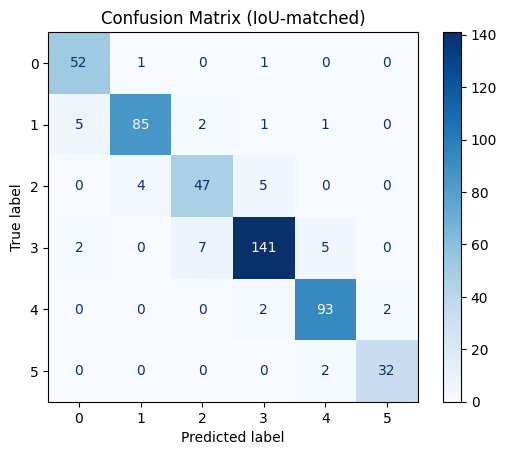

In [ ]:
#Perfomance evaluation
#Using IoU to match predictions with ground truth
def compute_iou(box1, box2):
    """Compute IoU between two boxes in [x1, y1, x2, y2] format."""
    x1 = max(box1[0], box2[0])
    y1 = max(box1[1], box2[1])
    x2 = min(box1[2], box2[2])
    y2 = min(box1[3], box2[3])

    inter_area = max(0, x2 - x1) * max(0, y2 - y1)
    box1_area = (box1[2]-box1[0]) * (box1[3]-box1[1])
    box2_area = (box2[2]-box2[0]) * (box2[3]-box2[1])
    union_area = box1_area + box2_area - inter_area

    return inter_area / union_area if union_area > 0 else 0

def parse_yolo_label(label_path, image_w, image_h):
    """Parses a YOLO label file and returns boxes in [x1, y1, x2, y2] and class labels."""
    boxes = []
    classes = []
    with open(label_path, 'r') as f:
        for line in f:
            cls, x, y, w, h = map(float, line.strip().split())
            cx, cy, bw, bh = x*image_w, y*image_h, w*image_w, h*image_h
            x1 = cx - bw / 2
            y1 = cy - bh / 2
            x2 = cx + bw / 2
            y2 = cy + bh / 2
            boxes.append([x1, y1, x2, y2])
            classes.append(int(cls))
    return boxes, classes

from PIL import Image
from sklearn.metrics import confusion_matrix

y_true = []
y_pred = []

for r in results:
    img_path = r.path
    label_path = img_path.replace('/images/', '/labels/').replace('.jpg', '.txt')
    img_w, img_h = Image.open(img_path).size

    gt_boxes, gt_classes = parse_yolo_label(label_path, img_w, img_h)

    pred_boxes = r.boxes.xyxy.cpu().numpy()
    pred_classes = r.boxes.cls.cpu().numpy().astype(int)

    matched_gt = set()

    for pb, pc in zip(pred_boxes, pred_classes):
        best_iou = 0
        best_gt_idx = -1
        for i, (gb, gc) in enumerate(zip(gt_boxes, gt_classes)):
            if i in matched_gt:
                continue
            iou = compute_iou(pb, gb)
            if iou > best_iou:
                best_iou = iou
                best_gt_idx = i
        if best_iou > 0.5:
            y_true.append(gt_classes[best_gt_idx])
            y_pred.append(pc)
            matched_gt.add(best_gt_idx)

# Now evaluate
cm = confusion_matrix(y_true, y_pred)
ConfusionMatrixDisplay(cm).plot(cmap='Blues')
plt.title("Confusion Matrix (IoU-matched)")
plt.show()

In [7]:
DRIVE_ROOT = Path('/content/drive/MyDrive/CV project')

In [14]:
# ---------------------------------------------
# 5. Prepare depth dataset dirs in Drive
# ---------------------------------------------
DEPTH_DS    = DRIVE_ROOT / 'dataset_depth'
DEPTH_IMAGE = DEPTH_DS / 'images'
DEPTH_LABEL = DEPTH_DS / 'labels'
for split in ['train', 'val', 'test']:
    (DEPTH_IMAGE / split).mkdir(parents=True, exist_ok=True)
    (DEPTH_LABEL / split).mkdir(parents=True, exist_ok=True)

# ---------------------------------------------
# 6. Load classes
# ---------------------------------------------
cfg_file = YOLO_DATA / 'data.yaml'
if not cfg_file.exists():
    raise FileNotFoundError(f"Missing config: {cfg_file}")
cfg = yaml.safe_load(cfg_file.read_text())
CLASSES = cfg.get('names', [])
NUM_CLASSES = cfg.get('nc', len(CLASSES))
print(f"Classes: {CLASSES}")

Classes: ['damage_0', 'damage_1', 'damage_2', 'damage_3', 'damage_4', 'damage_5']


In [15]:
# ---------------------------------------------
# 7. Depth estimation setup
# ---------------------------------------------
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"Depth estimation device: {device}")

midas = torch.hub.load('intel-isl/MiDaS', 'MiDaS_small')
midas.to(device).eval()
transform = torch.hub.load('intel-isl/MiDaS', 'transforms').small_transform

Depth estimation device: cuda


Using cache found in /root/.cache/torch/hub/intel-isl_MiDaS_master


Loading weights:  None


Using cache found in /root/.cache/torch/hub/rwightman_gen-efficientnet-pytorch_master
Using cache found in /root/.cache/torch/hub/intel-isl_MiDaS_master


In [16]:
# ---------------------------------------------
# 8. Depth map generation + label copy
# ---------------------------------------------
def compute_and_save_depth(src, dst):
    img = Image.open(src).convert('RGB')
    arr = np.array(img)
    inp = transform(arr).to(device)
    with torch.no_grad():
        pred = midas(inp)
        pred = torch.nn.functional.interpolate(pred.unsqueeze(1), size=arr.shape[:2], mode='bicubic', align_corners=False).squeeze()
    depth = pred.cpu().numpy()
    norm = ((depth - depth.min()) / (depth.max() - depth.min()) * 255).astype(np.uint8)
    Image.fromarray(norm).save(dst)

print("Generating depth maps...")
for split in ['train', 'val', 'test']:
    for img in (IMAGES_DIR / split).glob('*'):
        out = DEPTH_IMAGE / split / f"{img.stem}.png"
        compute_and_save_depth(img, out)
        lbl = LABELS_DIR / split / f"{img.stem}.txt"
        if lbl.exists():
            shutil.copy(lbl, DEPTH_LABEL / split / lbl.name)

Generating depth maps...


In [17]:
# ---------------------------------------------
# 9. Write YAML configs
# ---------------------------------------------
for fname, path in [('data.yaml', IMAGES_DIR), ('data_depth.yaml', DEPTH_IMAGE)]:
    cfgp = {'train': str(path / 'train'), 'val': str(path / 'val'), 'test': str(path / 'test'), 'nc': NUM_CLASSES, 'names': CLASSES}
    with open(YOLO_DATA / fname, 'w') as f:
        yaml.dump(cfgp, f)
print("YAML configs written.")

YAML configs written.


In [18]:
print("Training Depth-enhanced model...")
depth_res = train_model('data_depth.yaml', 'yolov8_depth')

Training Depth-enhanced model...
Ultralytics 8.3.128 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=True, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/CV project/dataset/data_depth.yaml, degrees=10.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=300, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=yolov8_depth2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=Tru

train: Scanning /content/drive/MyDrive/CV project/dataset_depth/labels/train... 403 images, 0 backgrounds, 0 corrupt: 100%|██████████| 403/403 [00:01<00:00, 214.20it/s]


train: New cache created: /content/drive/MyDrive/CV project/dataset_depth/labels/train.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 1.5±2.5 ms, read: 25.6±16.5 MB/s, size: 49.6 KB)


val: Scanning /content/drive/MyDrive/CV project/dataset_depth/labels/val... 53 images, 0 backgrounds, 0 corrupt: 100%|██████████| 53/53 [00:00<00:00, 111.59it/s]

val: New cache created: /content/drive/MyDrive/CV project/dataset_depth/labels/val.cache


Plotting labels to runs/detect/yolov8_depth2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/yolov8_depth2
Starting training for 300 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/300      2.83G      2.995      5.193      2.457         23        640: 100%|██████████| 51/51 [00:13<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.13it/s]


                   all         53        301      0.913    0.00321    0.00299   0.000912

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/300      2.83G      2.481      3.641       2.06         32        640: 100%|██████████| 51/51 [00:10<00:00,  4.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.12it/s]

                   all         53        301     0.0445     0.0607     0.0134    0.00543



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/300      2.83G      2.405       3.52      2.009         47        640: 100%|██████████| 51/51 [00:13<00:00,  3.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.80it/s]

                   all         53        301     0.0561     0.0294     0.0283     0.0119



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/300      2.83G      2.314       3.44       1.96         40        640: 100%|██████████| 51/51 [00:13<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.97it/s]

                   all         53        301      0.215     0.0468     0.0221    0.00802



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/300      2.83G      2.298      3.388      1.937         59        640: 100%|██████████| 51/51 [00:12<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.99it/s]

                   all         53        301     0.0554     0.0675     0.0333      0.014



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/300      2.83G      2.326      3.379      1.985         35        640: 100%|██████████| 51/51 [00:13<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.51it/s]

                   all         53        301      0.174     0.0865     0.0326     0.0134



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/300      2.83G      2.298      3.302      1.909         42        640: 100%|██████████| 51/51 [00:12<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.25it/s]

                   all         53        301      0.102     0.0546     0.0427     0.0177



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/300      2.83G      2.248      3.318      1.935         52        640: 100%|██████████| 51/51 [00:13<00:00,  3.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.94it/s]

                   all         53        301       0.21     0.0337     0.0328     0.0106



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/300      2.83G      2.197      3.266       1.89         33        640: 100%|██████████| 51/51 [00:12<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.03it/s]

                   all         53        301      0.135     0.0552     0.0544     0.0229



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/300      2.83G      2.171      3.198      1.893         39        640: 100%|██████████| 51/51 [00:13<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.96it/s]

                   all         53        301      0.489     0.0439     0.0651     0.0274



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/300      2.83G      2.177      3.213      1.878         41        640: 100%|██████████| 51/51 [00:13<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.63it/s]

                   all         53        301      0.481     0.0594     0.0418     0.0175



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/300      2.83G      2.207      3.196      1.892         35        640: 100%|██████████| 51/51 [00:12<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.89it/s]

                   all         53        301      0.137     0.0348     0.0396     0.0187



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/300      2.83G      2.195      3.163      1.893         50        640: 100%|██████████| 51/51 [00:12<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.59it/s]

                   all         53        301     0.0952     0.0813     0.0503     0.0216



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/300      2.83G      2.125      3.104       1.82         19        640: 100%|██████████| 51/51 [00:14<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.53it/s]

                   all         53        301      0.149     0.0888     0.0784     0.0292



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/300      2.83G      2.097      3.092      1.851         28        640: 100%|██████████| 51/51 [00:13<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.46it/s]

                   all         53        301      0.125     0.0852     0.0748     0.0363



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/300      2.83G      2.083      3.032      1.844         56        640: 100%|██████████| 51/51 [00:13<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.51it/s]

                   all         53        301      0.144      0.116      0.071      0.033



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/300      2.83G      2.209      3.088      1.858         54        640: 100%|██████████| 51/51 [00:14<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.31it/s]


                   all         53        301      0.138      0.142     0.0676     0.0304

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/300      2.83G      2.087      2.987      1.816         28        640: 100%|██████████| 51/51 [00:13<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.25it/s]

                   all         53        301      0.215        0.1      0.079     0.0377



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/300      2.83G      2.025      2.925      1.773         33        640: 100%|██████████| 51/51 [00:13<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.89it/s]


                   all         53        301      0.311       0.12     0.0993     0.0411

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/300      2.83G      2.045      2.938       1.83         21        640: 100%|██████████| 51/51 [00:13<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.05it/s]


                   all         53        301       0.17      0.132     0.0935     0.0425

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/300      2.87G      2.099      2.977      1.863         28        640: 100%|██████████| 51/51 [00:13<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.00it/s]

                   all         53        301       0.17      0.168      0.112     0.0585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/300      2.87G      2.054      2.941      1.786         39        640: 100%|██████████| 51/51 [00:13<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.93it/s]

                   all         53        301      0.182      0.146      0.112     0.0581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/300      2.87G      2.059      2.886        1.8         55        640: 100%|██████████| 51/51 [00:12<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.75it/s]

                   all         53        301      0.225      0.186      0.119     0.0636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/300      2.87G      2.001      2.843      1.771         28        640: 100%|██████████| 51/51 [00:14<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.91it/s]

                   all         53        301      0.187      0.149      0.127     0.0593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/300      2.87G      1.962       2.75      1.751         41        640: 100%|██████████| 51/51 [00:12<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.89it/s]

                   all         53        301       0.23      0.162      0.128     0.0668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/300      2.87G      1.933      2.692      1.707         41        640: 100%|██████████| 51/51 [00:15<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.24it/s]

                   all         53        301      0.312       0.15      0.131     0.0674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/300       2.9G      1.999      2.768      1.771         56        640: 100%|██████████| 51/51 [00:13<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.93it/s]

                   all         53        301      0.311      0.113     0.0993     0.0505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/300       2.9G      1.967      2.713      1.712         55        640: 100%|██████████| 51/51 [00:12<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.45it/s]

                   all         53        301       0.27      0.153      0.129     0.0644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/300       2.9G      1.948      2.614      1.704         40        640: 100%|██████████| 51/51 [00:12<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.25it/s]

                   all         53        301      0.178      0.192      0.131     0.0669



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/300       2.9G       1.92      2.661      1.694         45        640: 100%|██████████| 51/51 [00:12<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.07it/s]

                   all         53        301      0.178      0.183      0.129     0.0627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/300       2.9G      1.882      2.581      1.699         41        640: 100%|██████████| 51/51 [00:12<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.88it/s]

                   all         53        301      0.212      0.175       0.15     0.0705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/300       2.9G      1.911      2.629       1.72         17        640: 100%|██████████| 51/51 [00:13<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.23it/s]

                   all         53        301      0.216      0.196      0.144      0.068



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/300       2.9G      1.911      2.472      1.683         45        640: 100%|██████████| 51/51 [00:12<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.30it/s]

                   all         53        301      0.186      0.188       0.15     0.0667



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/300       2.9G      1.888      2.493      1.684         34        640: 100%|██████████| 51/51 [00:12<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.01it/s]

                   all         53        301       0.25      0.225      0.212      0.107



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/300       2.9G      1.828      2.445      1.629         21        640: 100%|██████████| 51/51 [00:13<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.92it/s]

                   all         53        301      0.221      0.196      0.172     0.0813



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/300       2.9G      1.833      2.517      1.628         49        640: 100%|██████████| 51/51 [00:12<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.09it/s]

                   all         53        301      0.277       0.22      0.189     0.0929



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/300       2.9G      1.746      2.326      1.599         32        640: 100%|██████████| 51/51 [00:12<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.24it/s]

                   all         53        301      0.379      0.284      0.278      0.155



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/300       2.9G      1.834      2.387      1.674         27        640: 100%|██████████| 51/51 [00:13<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.75it/s]

                   all         53        301      0.228      0.159      0.134     0.0595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/300       2.9G      1.963      2.471      1.702         37        640: 100%|██████████| 51/51 [00:14<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.45it/s]

                   all         53        301      0.342      0.188      0.195      0.101



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/300       2.9G       1.88      2.407      1.672         32        640: 100%|██████████| 51/51 [00:12<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.80it/s]

                   all         53        301      0.307      0.321       0.24       0.13



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/300       2.9G       1.82      2.319       1.62         22        640: 100%|██████████| 51/51 [00:12<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.35it/s]

                   all         53        301      0.327       0.28      0.255       0.12



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/300       2.9G      1.728      2.239      1.599         13        640: 100%|██████████| 51/51 [00:12<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.02it/s]

                   all         53        301      0.404      0.307      0.296      0.149



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/300      2.95G       1.79      2.249      1.579         30        640: 100%|██████████| 51/51 [00:12<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.88it/s]

                   all         53        301      0.361      0.272      0.238      0.113



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/300      2.95G      1.733      2.168      1.595         15        640: 100%|██████████| 51/51 [00:12<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.86it/s]

                   all         53        301      0.378      0.342      0.328      0.166



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/300      2.95G       1.75      2.161      1.558         47        640: 100%|██████████| 51/51 [00:14<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.31it/s]

                   all         53        301        0.4      0.287       0.26      0.126



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/300      2.95G      1.686      2.074      1.524         36        640: 100%|██████████| 51/51 [00:12<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.45it/s]

                   all         53        301      0.341      0.302      0.256      0.124



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/300      2.95G      1.704      2.093       1.56         31        640: 100%|██████████| 51/51 [00:12<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.72it/s]

                   all         53        301      0.476      0.346      0.347      0.196



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/300      2.95G      1.655      2.008      1.514         17        640: 100%|██████████| 51/51 [00:13<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.32it/s]

                   all         53        301      0.468      0.349      0.366      0.196



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/300      2.95G       1.65      1.998        1.5         25        640: 100%|██████████| 51/51 [00:13<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.55it/s]

                   all         53        301      0.391      0.382      0.359      0.176



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/300      2.95G      1.646      1.928      1.487         46        640: 100%|██████████| 51/51 [00:11<00:00,  4.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.59it/s]


                   all         53        301      0.359      0.356      0.285      0.145

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/300      2.98G      1.641      1.958      1.512         32        640: 100%|██████████| 51/51 [00:11<00:00,  4.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.57it/s]

                   all         53        301      0.463      0.439      0.426      0.244



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/300      2.98G      1.563      1.843      1.451         44        640: 100%|██████████| 51/51 [00:13<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.57it/s]

                   all         53        301      0.527      0.455       0.47      0.276



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/300      2.98G      1.555      1.778      1.436         30        640: 100%|██████████| 51/51 [00:13<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.26it/s]

                   all         53        301      0.534      0.415      0.435      0.272



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/300      2.98G      1.636      1.843      1.493         21        640: 100%|██████████| 51/51 [00:12<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.99it/s]

                   all         53        301      0.623      0.378      0.436      0.258



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/300      2.98G      1.614      1.825      1.468         26        640: 100%|██████████| 51/51 [00:12<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.69it/s]

                   all         53        301      0.541      0.365      0.377      0.209



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/300      2.98G      1.627      1.874      1.506         31        640: 100%|██████████| 51/51 [00:11<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.09it/s]

                   all         53        301       0.51       0.38      0.403      0.217



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/300      2.98G      1.549      1.742      1.456         20        640: 100%|██████████| 51/51 [00:11<00:00,  4.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.92it/s]

                   all         53        301      0.625      0.434      0.503      0.285



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/300      2.98G      1.538      1.723      1.434         13        640: 100%|██████████| 51/51 [00:13<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.43it/s]

                   all         53        301      0.611      0.435      0.483      0.273



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/300      2.98G      1.497      1.634      1.395         30        640: 100%|██████████| 51/51 [00:12<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.37it/s]

                   all         53        301      0.559      0.479      0.502      0.289



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/300      2.98G      1.471      1.601      1.378         27        640: 100%|██████████| 51/51 [00:10<00:00,  4.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.23it/s]

                   all         53        301      0.631      0.501      0.536      0.292



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/300      2.98G      1.606      1.773      1.464         21        640: 100%|██████████| 51/51 [00:13<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  9.96it/s]

                   all         53        301      0.548      0.408      0.443      0.274



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/300      2.98G      1.526       1.64      1.411         33        640: 100%|██████████| 51/51 [00:12<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.01it/s]

                   all         53        301      0.519      0.437      0.443      0.228



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/300      2.98G       1.52      1.644      1.405         26        640: 100%|██████████| 51/51 [00:12<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.20it/s]

                   all         53        301      0.522      0.492      0.494      0.277



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/300      2.98G      1.465      1.563      1.365         19        640: 100%|██████████| 51/51 [00:12<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.45it/s]

                   all         53        301      0.774      0.464      0.556      0.337



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/300      2.98G      1.403      1.469      1.338         35        640: 100%|██████████| 51/51 [00:13<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.67it/s]

                   all         53        301      0.623      0.413      0.491      0.272



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/300      2.98G      1.473      1.552      1.397         19        640: 100%|██████████| 51/51 [00:13<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.03it/s]


                   all         53        301      0.668      0.482      0.555      0.353

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/300      2.98G      1.459      1.551      1.363         39        640: 100%|██████████| 51/51 [00:13<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.22it/s]

                   all         53        301      0.631      0.493      0.542      0.337



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/300      2.98G      1.427       1.54      1.375         24        640: 100%|██████████| 51/51 [00:12<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.91it/s]

                   all         53        301      0.591      0.497      0.532      0.305



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/300      2.98G      1.415      1.466      1.343         30        640: 100%|██████████| 51/51 [00:12<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.61it/s]

                   all         53        301       0.69      0.521      0.612       0.37



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/300      2.98G      1.442      1.524      1.346         54        640: 100%|██████████| 51/51 [00:13<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.64it/s]

                   all         53        301       0.63      0.433      0.505      0.314



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/300      2.98G      1.452       1.54      1.361         30        640: 100%|██████████| 51/51 [00:12<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.20it/s]

                   all         53        301      0.752      0.471      0.575      0.328



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/300      2.98G      1.419      1.474      1.335         20        640: 100%|██████████| 51/51 [00:12<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.02it/s]

                   all         53        301      0.742      0.494      0.592      0.356



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/300      2.98G        1.5      1.558      1.371         48        640: 100%|██████████| 51/51 [00:12<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.32it/s]

                   all         53        301      0.548      0.282      0.322      0.182



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/300      2.98G      1.514      1.618       1.39         21        640: 100%|██████████| 51/51 [00:12<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.12it/s]

                   all         53        301       0.71      0.465      0.515      0.252



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/300      2.98G      1.476      1.535      1.401         33        640: 100%|██████████| 51/51 [00:12<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.82it/s]

                   all         53        301       0.73      0.428       0.51      0.309



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/300      2.98G      1.473       1.56      1.382         39        640: 100%|██████████| 51/51 [00:12<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.74it/s]

                   all         53        301      0.646      0.551      0.592      0.338



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/300      2.98G      1.381      1.401      1.315         32        640: 100%|██████████| 51/51 [00:12<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.35it/s]

                   all         53        301      0.772      0.473       0.58      0.338



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/300      2.98G      1.412      1.447      1.333         18        640: 100%|██████████| 51/51 [00:12<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.26it/s]

                   all         53        301      0.633      0.481      0.526       0.27



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/300      2.98G      1.371      1.387      1.322         39        640: 100%|██████████| 51/51 [00:12<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.26it/s]

                   all         53        301      0.755      0.522      0.603      0.368



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/300      2.98G      1.333      1.328        1.3         32        640: 100%|██████████| 51/51 [00:13<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.07it/s]

                   all         53        301      0.734      0.552      0.619      0.389



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/300      2.98G       1.33      1.302      1.294         25        640: 100%|██████████| 51/51 [00:13<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.98it/s]

                   all         53        301      0.687      0.508      0.591      0.372



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/300      2.98G      1.394      1.391      1.317         45        640: 100%|██████████| 51/51 [00:12<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.59it/s]

                   all         53        301      0.657      0.504      0.563      0.345



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/300      2.98G      1.355      1.326      1.296         40        640: 100%|██████████| 51/51 [00:12<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.31it/s]

                   all         53        301       0.72      0.523      0.606      0.376



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/300      2.98G      1.362      1.333      1.304         57        640: 100%|██████████| 51/51 [00:12<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.18it/s]

                   all         53        301      0.675      0.545       0.61      0.382



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/300      2.98G      1.367      1.324       1.29         47        640: 100%|██████████| 51/51 [00:12<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.00it/s]

                   all         53        301      0.754      0.561      0.664      0.428



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/300      2.98G      1.284      1.204      1.252         16        640: 100%|██████████| 51/51 [00:13<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.94it/s]

                   all         53        301      0.788      0.575       0.71      0.455



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/300      2.98G      1.277      1.186      1.239         37        640: 100%|██████████| 51/51 [00:13<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.62it/s]

                   all         53        301       0.78       0.57      0.684      0.408



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/300      2.98G      1.247       1.15      1.215         18        640: 100%|██████████| 51/51 [00:11<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.98it/s]

                   all         53        301      0.766      0.561      0.645      0.352



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/300      2.98G      1.341      1.247      1.261         41        640: 100%|██████████| 51/51 [00:11<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.85it/s]

                   all         53        301      0.683      0.581      0.651      0.349



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/300      2.98G       1.28      1.186      1.232         36        640: 100%|██████████| 51/51 [00:11<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.94it/s]

                   all         53        301      0.773       0.53      0.625       0.36



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/300      2.98G      1.263      1.151      1.223         50        640: 100%|██████████| 51/51 [00:12<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.21it/s]

                   all         53        301      0.724      0.625      0.677       0.44



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/300      2.98G        1.2      1.103      1.205         23        640: 100%|██████████| 51/51 [00:12<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.46it/s]

                   all         53        301      0.691       0.67      0.704      0.433



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/300      2.98G      1.271      1.178      1.249         21        640: 100%|██████████| 51/51 [00:12<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.35it/s]

                   all         53        301      0.824      0.534      0.659      0.442



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/300      2.98G      1.377      1.191      1.269         28        640: 100%|██████████| 51/51 [00:13<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.69it/s]

                   all         53        301      0.714      0.546      0.603      0.373



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/300      2.98G      1.557      1.479      1.398         37        640: 100%|██████████| 51/51 [00:12<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.14it/s]

                   all         53        301       0.62      0.472      0.529      0.246



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/300      2.98G      1.416      1.334      1.303         34        640: 100%|██████████| 51/51 [00:12<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.47it/s]

                   all         53        301      0.764       0.58      0.675      0.421



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/300      2.98G      1.329       1.27      1.287         34        640: 100%|██████████| 51/51 [00:12<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.87it/s]

                   all         53        301      0.711      0.639       0.68      0.392



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/300      2.98G      1.269      1.122      1.228         51        640: 100%|██████████| 51/51 [00:12<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.96it/s]

                   all         53        301      0.777      0.618      0.709      0.404



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/300      2.98G      1.394      1.246      1.289         36        640: 100%|██████████| 51/51 [00:12<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.71it/s]

                   all         53        301      0.658      0.565      0.618      0.391



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/300      2.98G      1.318       1.23      1.261         41        640: 100%|██████████| 51/51 [00:12<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.36it/s]

                   all         53        301      0.833       0.58      0.691      0.443



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/300      2.98G       1.22      1.092      1.207         59        640: 100%|██████████| 51/51 [00:12<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.76it/s]

                   all         53        301      0.745      0.643      0.718      0.468



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/300      2.98G      1.262      1.181      1.225         38        640: 100%|██████████| 51/51 [00:13<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.38it/s]

                   all         53        301        0.7      0.506      0.585      0.374



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/300      2.98G      1.329      1.294      1.269         68        640: 100%|██████████| 51/51 [00:12<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.74it/s]

                   all         53        301      0.665      0.621      0.665      0.426



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/300      2.98G      1.242      1.201      1.247         17        640: 100%|██████████| 51/51 [00:12<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.44it/s]

                   all         53        301      0.805      0.601      0.714      0.485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/300      2.98G      1.237      1.159       1.23         19        640: 100%|██████████| 51/51 [00:13<00:00,  3.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.96it/s]

                   all         53        301      0.719      0.633       0.68      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/300      2.98G      1.224      1.162      1.205         41        640: 100%|██████████| 51/51 [00:12<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.15it/s]

                   all         53        301      0.668      0.665        0.7      0.453



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/300      2.98G      1.228      1.092      1.198         32        640: 100%|██████████| 51/51 [00:12<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.50it/s]

                   all         53        301        0.7      0.657       0.69      0.386



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/300      2.98G      1.182      1.072      1.172         37        640: 100%|██████████| 51/51 [00:13<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.70it/s]

                   all         53        301      0.745       0.65      0.724      0.408



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/300      2.98G      1.153      1.006      1.162         39        640: 100%|██████████| 51/51 [00:12<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.49it/s]

                   all         53        301      0.833      0.613      0.738      0.442



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/300      2.98G      1.176      1.041      1.184         18        640: 100%|██████████| 51/51 [00:12<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.60it/s]

                   all         53        301      0.707      0.591      0.672      0.436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/300      2.98G      1.109     0.9481      1.143         51        640: 100%|██████████| 51/51 [00:12<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.04it/s]

                   all         53        301      0.786      0.675      0.752      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/300      2.98G      1.113     0.9668      1.153         24        640: 100%|██████████| 51/51 [00:13<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.48it/s]

                   all         53        301      0.842      0.664       0.76      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/300      2.98G      1.123       0.93      1.128         30        640: 100%|██████████| 51/51 [00:13<00:00,  3.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.02it/s]

                   all         53        301      0.858      0.656      0.757      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/300      2.98G      1.136     0.9844      1.145         56        640: 100%|██████████| 51/51 [00:13<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.83it/s]

                   all         53        301      0.783      0.668      0.726      0.474



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/300      2.98G      1.193      1.041      1.176         53        640: 100%|██████████| 51/51 [00:11<00:00,  4.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.22it/s]

                   all         53        301      0.787      0.698      0.764      0.482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/300      2.98G      1.142       1.02      1.167         29        640: 100%|██████████| 51/51 [00:11<00:00,  4.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.01it/s]

                   all         53        301      0.769      0.677      0.731      0.475



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/300      2.98G      1.149     0.9708      1.148         46        640: 100%|██████████| 51/51 [00:11<00:00,  4.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.99it/s]


                   all         53        301      0.849      0.676      0.761       0.49

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/300      2.98G      1.154      0.986      1.167         18        640: 100%|██████████| 51/51 [00:09<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.29it/s]

                   all         53        301      0.815      0.689      0.763      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/300      2.98G      1.122     0.9582      1.152         30        640: 100%|██████████| 51/51 [00:11<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.14it/s]

                   all         53        301      0.816      0.707       0.77      0.506



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/300      2.98G      1.086     0.9103      1.123         30        640: 100%|██████████| 51/51 [00:12<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.01it/s]

                   all         53        301      0.836      0.703      0.765       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/300      2.98G      1.089     0.9143      1.119         36        640: 100%|██████████| 51/51 [00:12<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.37it/s]

                   all         53        301      0.843      0.713      0.776      0.547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/300      2.98G      1.115     0.9122      1.126         34        640: 100%|██████████| 51/51 [00:15<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.57it/s]

                   all         53        301      0.899       0.66      0.768      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/300      2.98G      1.175     0.8902      1.135         24        640: 100%|██████████| 51/51 [00:12<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.83it/s]

                   all         53        301      0.818      0.683      0.759      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/300      2.98G      1.162     0.9557      1.163         46        640: 100%|██████████| 51/51 [00:12<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.49it/s]

                   all         53        301      0.774      0.653      0.719      0.466



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/300      2.98G      1.112     0.9291      1.125         34        640: 100%|██████████| 51/51 [00:12<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.02it/s]

                   all         53        301      0.857      0.649      0.737      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/300      2.98G      1.103     0.8897      1.116         22        640: 100%|██████████| 51/51 [00:12<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.68it/s]

                   all         53        301      0.822      0.694      0.761      0.534



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/300      2.98G      1.073     0.8539      1.108         14        640: 100%|██████████| 51/51 [00:12<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.58it/s]

                   all         53        301      0.766      0.641      0.716      0.457



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/300      2.98G      1.047     0.8646      1.105         44        640: 100%|██████████| 51/51 [00:12<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.27it/s]

                   all         53        301      0.812      0.701      0.783      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/300      2.98G      1.049     0.8404      1.102         44        640: 100%|██████████| 51/51 [00:13<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.75it/s]

                   all         53        301      0.812      0.699      0.765       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/300      2.98G      1.028     0.8132      1.078         39        640: 100%|██████████| 51/51 [00:12<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.81it/s]

                   all         53        301      0.851      0.686      0.771      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/300      2.98G      1.055     0.8677      1.113         25        640: 100%|██████████| 51/51 [00:12<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.16it/s]

                   all         53        301      0.871      0.725      0.792      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/300      2.98G      1.092      0.914      1.129         15        640: 100%|██████████| 51/51 [00:12<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.17it/s]

                   all         53        301      0.843      0.679      0.774       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/300      2.98G      1.022     0.8413      1.077         48        640: 100%|██████████| 51/51 [00:12<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.41it/s]

                   all         53        301      0.863      0.726      0.799      0.552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    134/300      2.98G      1.044     0.8334      1.086         39        640: 100%|██████████| 51/51 [00:12<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.26it/s]

                   all         53        301      0.887      0.703      0.795      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    135/300      2.98G      1.103     0.9164      1.133         46        640: 100%|██████████| 51/51 [00:12<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.85it/s]

                   all         53        301      0.803      0.693      0.755       0.47



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    136/300      2.98G      1.081     0.8865       1.12         26        640: 100%|██████████| 51/51 [00:13<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.80it/s]

                   all         53        301      0.814      0.728      0.771      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    137/300      2.98G       1.06     0.8663      1.095         37        640: 100%|██████████| 51/51 [00:12<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.81it/s]

                   all         53        301       0.83      0.691      0.758      0.501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    138/300      2.98G      1.081     0.8785      1.102         30        640: 100%|██████████| 51/51 [00:12<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.10it/s]

                   all         53        301       0.84      0.664      0.755      0.539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    139/300      2.98G      1.089     0.8986       1.11         20        640: 100%|██████████| 51/51 [00:12<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.63it/s]

                   all         53        301      0.861       0.71      0.791      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    140/300      2.98G      1.025      0.829      1.088         62        640: 100%|██████████| 51/51 [00:13<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.56it/s]

                   all         53        301      0.822      0.775      0.801      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    141/300      2.98G      1.007     0.8098      1.079         62        640: 100%|██████████| 51/51 [00:12<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.39it/s]

                   all         53        301      0.851      0.743      0.803      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    142/300      2.98G       1.03     0.8505      1.094         26        640: 100%|██████████| 51/51 [00:13<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.90it/s]

                   all         53        301      0.865      0.734      0.786      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    143/300      2.98G      1.045     0.8286      1.084         47        640: 100%|██████████| 51/51 [00:12<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.39it/s]

                   all         53        301      0.884      0.721      0.795      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    144/300      2.98G      1.066     0.8584        1.1         42        640: 100%|██████████| 51/51 [00:12<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.06it/s]

                   all         53        301       0.88      0.726      0.796      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    145/300      2.98G      1.112     0.8549      1.095         36        640: 100%|██████████| 51/51 [00:12<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.70it/s]

                   all         53        301      0.828      0.659      0.755      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    146/300      2.98G      1.097     0.8944      1.113         23        640: 100%|██████████| 51/51 [00:12<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.33it/s]

                   all         53        301      0.882      0.709      0.811      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    147/300      2.98G      1.084     0.8498      1.096         34        640: 100%|██████████| 51/51 [00:13<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.82it/s]


                   all         53        301      0.757      0.666       0.73      0.471

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    148/300      2.98G      1.156     0.9283      1.132         48        640: 100%|██████████| 51/51 [00:12<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.27it/s]

                   all         53        301      0.808      0.689      0.753      0.523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    149/300      2.98G      1.094     0.8651      1.111         48        640: 100%|██████████| 51/51 [00:11<00:00,  4.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.32it/s]

                   all         53        301      0.871      0.697      0.754      0.442



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    150/300      2.98G      1.047     0.8026      1.085         32        640: 100%|██████████| 51/51 [00:13<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.08it/s]


                   all         53        301      0.865      0.673      0.744      0.471

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    151/300      2.98G      1.029      0.826      1.097         18        640: 100%|██████████| 51/51 [00:11<00:00,  4.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.85it/s]

                   all         53        301      0.851      0.707       0.78      0.552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    152/300      2.98G     0.9822     0.7693      1.074         27        640: 100%|██████████| 51/51 [00:11<00:00,  4.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.97it/s]

                   all         53        301      0.865      0.789      0.837      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    153/300      2.98G      1.091     0.7983      1.081         48        640: 100%|██████████| 51/51 [00:13<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.74it/s]

                   all         53        301      0.857      0.701      0.779      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    154/300      2.98G      1.396     0.9625       1.24         39        640: 100%|██████████| 51/51 [00:12<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.38it/s]

                   all         53        301       0.77      0.525      0.598      0.244



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    155/300      2.98G      1.533      1.123      1.334         29        640: 100%|██████████| 51/51 [00:12<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.30it/s]

                   all         53        301      0.818      0.631      0.705      0.469



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    156/300      2.98G      1.167     0.9561       1.17         23        640: 100%|██████████| 51/51 [00:12<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.56it/s]

                   all         53        301      0.841      0.758        0.8       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    157/300      2.98G      1.061     0.8355      1.091         22        640: 100%|██████████| 51/51 [00:12<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.68it/s]

                   all         53        301      0.877      0.736      0.799      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    158/300      2.98G      1.041     0.8297      1.089         29        640: 100%|██████████| 51/51 [00:12<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.89it/s]

                   all         53        301      0.907      0.724      0.804      0.553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    159/300      2.98G      1.067     0.8434        1.1         25        640: 100%|██████████| 51/51 [00:12<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.26it/s]

                   all         53        301      0.899      0.738      0.816      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    160/300      2.98G     0.9826     0.7667      1.062         38        640: 100%|██████████| 51/51 [00:12<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.16it/s]

                   all         53        301      0.894      0.756      0.834      0.617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    161/300      2.98G      1.001     0.7615      1.053         45        640: 100%|██████████| 51/51 [00:13<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.38it/s]

                   all         53        301      0.863      0.722       0.81      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    162/300      2.98G      1.069     0.8287      1.097         20        640: 100%|██████████| 51/51 [00:12<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.04it/s]

                   all         53        301      0.868      0.768      0.829      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    163/300      2.98G      1.037     0.7991      1.085         47        640: 100%|██████████| 51/51 [00:12<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.38it/s]

                   all         53        301      0.844      0.709      0.777      0.569



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    164/300      2.98G     0.9839     0.7445      1.058         24        640: 100%|██████████| 51/51 [00:12<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.22it/s]

                   all         53        301      0.858      0.717       0.77      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    165/300      2.98G     0.9616     0.7489      1.053         55        640: 100%|██████████| 51/51 [00:13<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.50it/s]

                   all         53        301      0.891      0.775      0.826      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    166/300      2.98G     0.9418     0.7302      1.026         40        640: 100%|██████████| 51/51 [00:12<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.68it/s]

                   all         53        301      0.858      0.796      0.824      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    167/300      2.98G      0.963     0.7352      1.056         42        640: 100%|██████████| 51/51 [00:12<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.51it/s]

                   all         53        301      0.894      0.757      0.813      0.617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    168/300      2.98G      1.004     0.7629      1.058         21        640: 100%|██████████| 51/51 [00:12<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.79it/s]

                   all         53        301      0.867      0.778      0.832      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    169/300      2.98G     0.9666     0.7558      1.051         32        640: 100%|██████████| 51/51 [00:12<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.64it/s]

                   all         53        301      0.887      0.785      0.822      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    170/300      2.98G     0.9733     0.7549      1.054         16        640: 100%|██████████| 51/51 [00:12<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.64it/s]

                   all         53        301      0.879      0.728      0.818      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    171/300      2.98G      1.019     0.8222      1.075         31        640: 100%|██████████| 51/51 [00:12<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.49it/s]

                   all         53        301      0.863      0.724      0.793      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    172/300      2.98G      1.018       0.81      1.082         43        640: 100%|██████████| 51/51 [00:12<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.39it/s]

                   all         53        301      0.886      0.755      0.822      0.561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    173/300      2.98G      1.026     0.8047       1.07         16        640: 100%|██████████| 51/51 [00:12<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.01it/s]

                   all         53        301      0.895      0.767      0.814      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    174/300      2.98G      1.037     0.7835      1.078         33        640: 100%|██████████| 51/51 [00:13<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.30it/s]

                   all         53        301      0.895      0.757      0.808      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    175/300      2.98G      1.039     0.7809      1.069         44        640: 100%|██████████| 51/51 [00:12<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.96it/s]

                   all         53        301       0.87      0.785      0.817      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    176/300      2.98G     0.9879     0.7469      1.045         34        640: 100%|██████████| 51/51 [00:13<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.39it/s]

                   all         53        301      0.896      0.755      0.811      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    177/300      2.98G      1.002     0.7273      1.047         35        640: 100%|██████████| 51/51 [00:12<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.84it/s]

                   all         53        301      0.843      0.751       0.79      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    178/300      2.98G     0.9962     0.7756      1.066         17        640: 100%|██████████| 51/51 [00:12<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.83it/s]

                   all         53        301      0.879      0.758      0.811      0.615



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    179/300      2.98G     0.9319     0.7109      1.033         55        640: 100%|██████████| 51/51 [00:13<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.20it/s]

                   all         53        301      0.893      0.741      0.816      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    180/300      2.98G     0.9118     0.6837      1.019         25        640: 100%|██████████| 51/51 [00:12<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.90it/s]

                   all         53        301      0.857      0.767       0.81      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    181/300      2.98G     0.9879     0.7021      1.035         32        640: 100%|██████████| 51/51 [00:12<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.64it/s]

                   all         53        301       0.85       0.74        0.8      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    182/300      2.98G     0.9663     0.7099      1.034         39        640: 100%|██████████| 51/51 [00:12<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.11it/s]

                   all         53        301      0.883      0.751      0.801      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    183/300      2.98G     0.9414     0.6876      1.029         26        640: 100%|██████████| 51/51 [00:12<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.51it/s]

                   all         53        301      0.879      0.752      0.815      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    184/300      2.98G     0.9473     0.7421      1.046         38        640: 100%|██████████| 51/51 [00:12<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.22it/s]

                   all         53        301      0.916      0.717       0.79      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    185/300      2.98G     0.9315     0.6916      1.039         15        640: 100%|██████████| 51/51 [00:12<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.07it/s]

                   all         53        301      0.935      0.752      0.804      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    186/300      2.98G     0.8995     0.6871      1.026         49        640: 100%|██████████| 51/51 [00:12<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.94it/s]

                   all         53        301      0.896      0.738      0.819      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    187/300      2.98G     0.8828     0.6379     0.9993         27        640: 100%|██████████| 51/51 [00:12<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.15it/s]

                   all         53        301      0.929      0.752      0.817      0.631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    188/300      2.98G     0.9225     0.6937      1.024         22        640: 100%|██████████| 51/51 [00:13<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.90it/s]

                   all         53        301      0.882      0.732      0.803      0.617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    189/300      2.98G     0.9344     0.7039      1.027         20        640: 100%|██████████| 51/51 [00:12<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.77it/s]

                   all         53        301      0.916      0.741      0.805      0.612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    190/300      2.98G      0.943     0.7168      1.041         46        640: 100%|██████████| 51/51 [00:12<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.28it/s]

                   all         53        301      0.905      0.745      0.803      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    191/300      2.98G     0.8907     0.6608      1.007         45        640: 100%|██████████| 51/51 [00:12<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.12it/s]

                   all         53        301      0.878      0.772      0.811      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    192/300      2.98G     0.9107     0.6899       1.01         37        640: 100%|██████████| 51/51 [00:12<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.31it/s]

                   all         53        301      0.936      0.769      0.823      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    193/300      2.98G     0.9226     0.7078      1.028         22        640: 100%|██████████| 51/51 [00:12<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.73it/s]

                   all         53        301      0.888      0.775      0.803      0.614



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    194/300      2.98G     0.8937     0.6962      1.019         27        640: 100%|██████████| 51/51 [00:14<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.04it/s]

                   all         53        301      0.916      0.761      0.801      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    195/300      2.98G     0.8727       0.66      1.005         31        640: 100%|██████████| 51/51 [00:12<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.43it/s]

                   all         53        301      0.899      0.763      0.812      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    196/300      2.98G     0.8621     0.6581      1.007         22        640: 100%|██████████| 51/51 [00:12<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.11it/s]

                   all         53        301        0.9      0.778      0.825       0.66



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    197/300      2.98G     0.8554     0.6294     0.9867         37        640: 100%|██████████| 51/51 [00:13<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.23it/s]

                   all         53        301      0.923      0.759      0.817      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    198/300      2.98G     0.8482     0.6196     0.9872         29        640: 100%|██████████| 51/51 [00:12<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.86it/s]

                   all         53        301      0.891       0.78      0.829      0.649



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    199/300      2.98G     0.8794      0.643      0.997         39        640: 100%|██████████| 51/51 [00:12<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.72it/s]

                   all         53        301      0.925       0.76      0.816      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    200/300      2.98G     0.9628     0.6659      1.029         63        640: 100%|██████████| 51/51 [00:12<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.87it/s]

                   all         53        301      0.902       0.76      0.817      0.634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    201/300      2.98G     0.9759     0.6797      1.039         52        640: 100%|██████████| 51/51 [00:12<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.28it/s]

                   all         53        301      0.937      0.759      0.825      0.636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    202/300      2.98G      1.034      0.692       1.04         40        640: 100%|██████████| 51/51 [00:12<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.52it/s]

                   all         53        301      0.918      0.788      0.823      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    203/300      2.98G      1.002     0.6699      1.044         30        640: 100%|██████████| 51/51 [00:12<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.65it/s]

                   all         53        301      0.891      0.769      0.823      0.635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    204/300      2.98G      0.955     0.6882      1.034         14        640: 100%|██████████| 51/51 [00:12<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.33it/s]

                   all         53        301      0.911       0.74      0.828       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    205/300      2.98G     0.8966     0.6619      1.021         38        640: 100%|██████████| 51/51 [00:12<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.93it/s]

                   all         53        301      0.932       0.78      0.836      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    206/300      2.98G     0.8454     0.6102     0.9837         30        640: 100%|██████████| 51/51 [00:12<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.01it/s]

                   all         53        301      0.944      0.758      0.838       0.67



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    207/300      2.98G     0.8297     0.5997     0.9771         37        640: 100%|██████████| 51/51 [00:13<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.82it/s]

                   all         53        301      0.897       0.77       0.82      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    208/300      2.98G     0.8736     0.6314          1         25        640: 100%|██████████| 51/51 [00:13<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.54it/s]

                   all         53        301       0.91      0.729      0.809      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    209/300      2.98G     0.9073     0.6411      1.002         31        640: 100%|██████████| 51/51 [00:11<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.29it/s]

                   all         53        301      0.922      0.747      0.814      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    210/300      2.98G     0.9004     0.6362      1.013         48        640: 100%|██████████| 51/51 [00:11<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.63it/s]

                   all         53        301      0.904      0.757      0.814      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    211/300      2.98G     0.8675     0.6371     0.9987         47        640: 100%|██████████| 51/51 [00:11<00:00,  4.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.91it/s]

                   all         53        301      0.931      0.752      0.822       0.66



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    212/300      2.98G     0.8458     0.6285     0.9969         36        640: 100%|██████████| 51/51 [00:11<00:00,  4.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.11it/s]

                   all         53        301      0.923      0.761      0.822      0.628



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    213/300      2.98G      0.829      0.607     0.9869         43        640: 100%|██████████| 51/51 [00:11<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.19it/s]

                   all         53        301      0.923      0.753      0.829      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    214/300      2.98G     0.8276     0.6019     0.9765         57        640: 100%|██████████| 51/51 [00:11<00:00,  4.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.92it/s]

                   all         53        301      0.918      0.766      0.833      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    215/300      2.98G     0.8218     0.6018     0.9749         47        640: 100%|██████████| 51/51 [00:12<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.43it/s]


                   all         53        301      0.938      0.775      0.828      0.661

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    216/300      2.98G     0.8082      0.577      0.965         47        640: 100%|██████████| 51/51 [00:11<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.08it/s]

                   all         53        301      0.883      0.755       0.81      0.635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    217/300      2.98G     0.8197     0.5844     0.9776         35        640: 100%|██████████| 51/51 [00:11<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.98it/s]

                   all         53        301      0.904      0.784      0.814       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    218/300      2.98G     0.8089     0.5776     0.9675         47        640: 100%|██████████| 51/51 [00:12<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.42it/s]

                   all         53        301      0.925      0.749      0.821      0.631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    219/300      2.98G     0.8021       0.57     0.9713         18        640: 100%|██████████| 51/51 [00:12<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.60it/s]

                   all         53        301       0.91      0.787      0.832      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    220/300      2.98G     0.8218     0.5994     0.9729         83        640: 100%|██████████| 51/51 [00:12<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.77it/s]

                   all         53        301      0.907      0.785      0.832       0.66



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    221/300      2.98G     0.7745     0.5681     0.9697         31        640: 100%|██████████| 51/51 [00:12<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.45it/s]

                   all         53        301      0.904      0.779      0.831       0.66



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    222/300      2.98G     0.8201     0.6102     0.9822         27        640: 100%|██████████| 51/51 [00:12<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.69it/s]

                   all         53        301      0.902      0.787       0.83      0.675



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    223/300      2.98G      0.819     0.6067     0.9719         10        640: 100%|██████████| 51/51 [00:13<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.47it/s]

                   all         53        301      0.889      0.794      0.816      0.664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    224/300      3.01G     0.8421     0.6141      0.997         13        640: 100%|██████████| 51/51 [00:13<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.71it/s]

                   all         53        301      0.924      0.784      0.827      0.664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    225/300      3.01G     0.8271     0.5799     0.9688         33        640: 100%|██████████| 51/51 [00:12<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.39it/s]

                   all         53        301      0.895      0.781      0.827       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    226/300      3.01G     0.8477     0.5898     0.9737         66        640: 100%|██████████| 51/51 [00:12<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.12it/s]

                   all         53        301      0.875      0.784      0.824      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    227/300      3.01G     0.8295      0.589     0.9716         56        640: 100%|██████████| 51/51 [00:12<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.29it/s]

                   all         53        301      0.934      0.776      0.824      0.654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    228/300      3.01G      0.799     0.5766     0.9787         21        640: 100%|██████████| 51/51 [00:12<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.86it/s]

                   all         53        301      0.929      0.796      0.837      0.652



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    229/300      3.01G      0.775     0.5492     0.9635         31        640: 100%|██████████| 51/51 [00:12<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.32it/s]

                   all         53        301      0.919      0.784      0.834      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    230/300      3.01G     0.7723     0.5509     0.9519         48        640: 100%|██████████| 51/51 [00:12<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.77it/s]

                   all         53        301      0.923      0.777      0.832      0.685



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    231/300      3.01G     0.7865      0.584     0.9664         30        640: 100%|██████████| 51/51 [00:13<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.26it/s]

                   all         53        301      0.896      0.789      0.835      0.683



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    232/300      3.01G     0.8147     0.5858     0.9722         37        640: 100%|██████████| 51/51 [00:12<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.85it/s]

                   all         53        301      0.868      0.787      0.827      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    233/300      3.01G     0.8181     0.5936     0.9789         22        640: 100%|██████████| 51/51 [00:12<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.56it/s]

                   all         53        301      0.913      0.781      0.824      0.653



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    234/300      3.01G     0.7752     0.5593     0.9638         28        640: 100%|██████████| 51/51 [00:12<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.08it/s]

                   all         53        301      0.911      0.786      0.823      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    235/300      3.01G     0.8094     0.5974     0.9757         23        640: 100%|██████████| 51/51 [00:12<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.53it/s]

                   all         53        301      0.936       0.78      0.827      0.664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    236/300      3.01G     0.7545     0.5556     0.9594         17        640: 100%|██████████| 51/51 [00:12<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.89it/s]

                   all         53        301      0.924      0.801      0.827      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    237/300      3.01G     0.7916      0.591     0.9656         30        640: 100%|██████████| 51/51 [00:12<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.04it/s]

                   all         53        301      0.912      0.786      0.827      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    238/300      3.01G     0.7638      0.565     0.9674         15        640: 100%|██████████| 51/51 [00:12<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.18it/s]

                   all         53        301      0.936      0.765      0.814      0.672



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    239/300      3.01G     0.7733     0.5564      0.948         47        640: 100%|██████████| 51/51 [00:14<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.72it/s]

                   all         53        301      0.928      0.771      0.825       0.67



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    240/300      3.01G     0.7566     0.5517     0.9526         57        640: 100%|██████████| 51/51 [00:11<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.23it/s]

                   all         53        301      0.947      0.763      0.834      0.677



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    241/300      3.01G     0.7454     0.5421       0.95         46        640: 100%|██████████| 51/51 [00:11<00:00,  4.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.43it/s]

                   all         53        301      0.945       0.77      0.818       0.65



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    242/300      3.01G     0.7756     0.5781     0.9699         33        640: 100%|██████████| 51/51 [00:11<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.29it/s]


                   all         53        301       0.93      0.782      0.827      0.655

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    243/300      3.01G     0.7799     0.5659     0.9577         55        640: 100%|██████████| 51/51 [00:12<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.18it/s]

                   all         53        301       0.91      0.803      0.834      0.674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    244/300      3.01G     0.7745     0.5692     0.9657         56        640: 100%|██████████| 51/51 [00:11<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.95it/s]

                   all         53        301      0.908      0.787      0.839      0.673



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    245/300      3.01G     0.7608     0.5526     0.9501         33        640: 100%|██████████| 51/51 [00:11<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.70it/s]

                   all         53        301      0.953      0.759      0.839      0.672



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    246/300      3.01G     0.7739     0.5504     0.9625         44        640: 100%|██████████| 51/51 [00:11<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.55it/s]


                   all         53        301      0.933      0.794      0.849      0.682

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    247/300      3.01G     0.7324     0.5288     0.9446         34        640: 100%|██████████| 51/51 [00:11<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.30it/s]

                   all         53        301      0.914      0.795      0.849      0.686



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    248/300      3.01G     0.7528      0.535      0.954         38        640: 100%|██████████| 51/51 [00:13<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.49it/s]

                   all         53        301       0.94      0.794      0.848      0.673



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    249/300      3.01G     0.7317     0.5293     0.9488         16        640: 100%|██████████| 51/51 [00:12<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.36it/s]

                   all         53        301       0.94      0.774      0.838      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    250/300      3.01G     0.7517     0.5274     0.9388         35        640: 100%|██████████| 51/51 [00:13<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.51it/s]

                   all         53        301      0.927      0.789       0.83      0.685



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    251/300      3.01G      0.753      0.547     0.9441         33        640: 100%|██████████| 51/51 [00:12<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.77it/s]

                   all         53        301      0.918      0.795      0.834      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    252/300      3.01G     0.7528     0.5475     0.9368         51        640: 100%|██████████| 51/51 [00:12<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.30it/s]

                   all         53        301      0.923      0.788      0.833       0.69



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    253/300      3.01G     0.7311     0.5312     0.9451         43        640: 100%|██████████| 51/51 [00:12<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.90it/s]

                   all         53        301      0.919      0.781      0.838      0.685



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    254/300      3.01G     0.7463     0.5462     0.9372         27        640: 100%|██████████| 51/51 [00:13<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.82it/s]

                   all         53        301       0.96      0.752      0.842      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    255/300      3.01G     0.7312     0.5136     0.9337         39        640: 100%|██████████| 51/51 [00:12<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.55it/s]

                   all         53        301      0.943      0.778      0.846      0.696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    256/300      3.01G     0.7486     0.5466     0.9423         23        640: 100%|██████████| 51/51 [00:12<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.14it/s]

                   all         53        301       0.94      0.774      0.842      0.711



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    257/300      3.01G     0.7341     0.5426     0.9483          7        640: 100%|██████████| 51/51 [00:13<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.69it/s]

                   all         53        301      0.918        0.8      0.841      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    258/300      3.01G     0.7622     0.5712     0.9551         42        640: 100%|██████████| 51/51 [00:12<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.21it/s]

                   all         53        301      0.946      0.781      0.842       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    259/300      3.01G     0.7115     0.5275     0.9399         44        640: 100%|██████████| 51/51 [00:12<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.83it/s]

                   all         53        301       0.94      0.792      0.843      0.706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    260/300      3.01G     0.7626     0.5628     0.9538         36        640: 100%|██████████| 51/51 [00:12<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.18it/s]


                   all         53        301      0.931      0.791      0.846        0.7

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    261/300      3.01G     0.7325     0.5284     0.9423         34        640: 100%|██████████| 51/51 [00:12<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.18it/s]

                   all         53        301      0.947      0.792      0.842      0.685



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    262/300      3.01G     0.7295     0.5252     0.9451         66        640: 100%|██████████| 51/51 [00:12<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.19it/s]

                   all         53        301      0.895      0.811       0.84       0.67



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    263/300      3.01G     0.7712     0.5463     0.9388         27        640: 100%|██████████| 51/51 [00:12<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.08it/s]

                   all         53        301      0.915      0.784      0.835      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    264/300      3.01G     0.7344     0.5288     0.9393         33        640: 100%|██████████| 51/51 [00:12<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.17it/s]

                   all         53        301       0.93      0.778      0.827      0.686



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    265/300      3.01G     0.7277     0.5261     0.9401         35        640: 100%|██████████| 51/51 [00:12<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.78it/s]

                   all         53        301      0.934      0.757      0.836      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    266/300      3.01G     0.7185     0.5196     0.9407         22        640: 100%|██████████| 51/51 [00:12<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.35it/s]

                   all         53        301      0.917       0.78      0.835      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    267/300      3.01G     0.6863     0.4857     0.9225         35        640: 100%|██████████| 51/51 [00:12<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.95it/s]

                   all         53        301      0.929      0.776      0.833      0.704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    268/300      3.01G      0.713     0.5194     0.9435         43        640: 100%|██████████| 51/51 [00:12<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.70it/s]

                   all         53        301      0.936      0.776      0.828      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    269/300      3.01G     0.6972     0.4959     0.9224         23        640: 100%|██████████| 51/51 [00:14<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.48it/s]

                   all         53        301       0.93      0.785      0.836      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    270/300      3.01G     0.6916     0.4976      0.927         40        640: 100%|██████████| 51/51 [00:12<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.60it/s]

                   all         53        301      0.915      0.792      0.835       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    271/300      3.01G     0.7092     0.5253     0.9405         31        640: 100%|██████████| 51/51 [00:12<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.32it/s]

                   all         53        301      0.934      0.777      0.836      0.712



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    272/300      3.01G      0.695     0.5022     0.9298         43        640: 100%|██████████| 51/51 [00:13<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.44it/s]

                   all         53        301       0.91      0.782      0.843      0.702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    273/300      3.01G     0.6864     0.4846     0.9234         51        640: 100%|██████████| 51/51 [00:12<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.26it/s]

                   all         53        301      0.917      0.782      0.832      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    274/300      3.01G     0.7069      0.502     0.9323         57        640: 100%|██████████| 51/51 [00:12<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.87it/s]

                   all         53        301      0.931      0.786      0.835      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    275/300      3.01G     0.7037     0.5126      0.929         30        640: 100%|██████████| 51/51 [00:12<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.58it/s]

                   all         53        301      0.915      0.798      0.834      0.693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    276/300      3.01G     0.6693     0.4853     0.9183         34        640: 100%|██████████| 51/51 [00:12<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.30it/s]

                   all         53        301       0.92       0.79      0.835      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    277/300      3.01G     0.6918     0.5008     0.9316         13        640: 100%|██████████| 51/51 [00:12<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.21it/s]

                   all         53        301      0.936      0.783      0.831      0.694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    278/300      3.01G     0.6878     0.4974     0.9265         14        640: 100%|██████████| 51/51 [00:12<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.44it/s]

                   all         53        301      0.939       0.79      0.834       0.69



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    279/300      3.01G     0.6726     0.4797     0.9208         53        640: 100%|██████████| 51/51 [00:12<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.40it/s]

                   all         53        301       0.94      0.786      0.837      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    280/300      3.01G     0.6878     0.5045     0.9399         19        640: 100%|██████████| 51/51 [00:12<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.21it/s]

                   all         53        301      0.924      0.795      0.833      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    281/300      3.01G     0.6563     0.4639     0.9144         51        640: 100%|██████████| 51/51 [00:12<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.32it/s]

                   all         53        301      0.947      0.781      0.836       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    282/300      3.01G     0.6655     0.4876     0.9284         27        640: 100%|██████████| 51/51 [00:12<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.34it/s]

                   all         53        301      0.948      0.782      0.834      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    283/300      3.01G     0.6563     0.4632     0.9158         41        640: 100%|██████████| 51/51 [00:12<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.27it/s]

                   all         53        301      0.951       0.78      0.834      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    284/300      3.01G     0.6894     0.4946     0.9283         29        640: 100%|██████████| 51/51 [00:14<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.31it/s]

                   all         53        301      0.933      0.786      0.838      0.704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    285/300      3.01G     0.6776     0.4839     0.9232         21        640: 100%|██████████| 51/51 [00:12<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.22it/s]

                   all         53        301      0.944       0.79      0.837        0.7



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    286/300      3.01G       0.67     0.4999     0.9272         32        640: 100%|██████████| 51/51 [00:12<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.81it/s]

                   all         53        301      0.928      0.798      0.842      0.719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    287/300      3.01G     0.6753     0.4933     0.9271         33        640: 100%|██████████| 51/51 [00:13<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.72it/s]

                   all         53        301      0.934      0.783      0.834      0.707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    288/300      3.01G     0.6833     0.4848     0.9177         45        640: 100%|██████████| 51/51 [00:12<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.50it/s]

                   all         53        301      0.941      0.784      0.838      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    289/300      3.01G     0.6641     0.4752     0.9152         51        640: 100%|██████████| 51/51 [00:12<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.24it/s]

                   all         53        301      0.945       0.78      0.841      0.716



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    290/300      3.01G     0.6627     0.4835     0.9224         16        640: 100%|██████████| 51/51 [00:12<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.92it/s]

                   all         53        301      0.947      0.788      0.841        0.7


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    291/300      3.01G     0.6852     0.4501     0.9251         23        640: 100%|██████████| 51/51 [00:13<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.30it/s]


                   all         53        301      0.948      0.774      0.829      0.677

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    292/300      3.01G     0.6423     0.4181     0.9155         13        640: 100%|██████████| 51/51 [00:11<00:00,  4.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.34it/s]

                   all         53        301      0.938       0.78      0.827      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    293/300      3.01G     0.6028     0.4038     0.9014         15        640: 100%|██████████| 51/51 [00:11<00:00,  4.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.67it/s]

                   all         53        301      0.949       0.78      0.831      0.699



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    294/300      3.01G     0.6236     0.4109     0.9093         15        640: 100%|██████████| 51/51 [00:11<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.00it/s]

                   all         53        301      0.947      0.771      0.833        0.7



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    295/300      3.01G     0.5847     0.3815     0.8916          9        640: 100%|██████████| 51/51 [00:12<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.60it/s]

                   all         53        301      0.922      0.788      0.832      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    296/300      3.01G      0.581      0.371     0.8861         11        640: 100%|██████████| 51/51 [00:12<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.41it/s]

                   all         53        301       0.95      0.771      0.837      0.713



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    297/300      3.01G     0.5924      0.385     0.8883         18        640: 100%|██████████| 51/51 [00:12<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.75it/s]

                   all         53        301      0.949      0.772      0.843      0.715



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    298/300      3.01G     0.5827      0.388     0.8936         19        640: 100%|██████████| 51/51 [00:12<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.99it/s]

                   all         53        301      0.947      0.772      0.844      0.717



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    299/300      3.01G     0.5656     0.3762       0.89         19        640: 100%|██████████| 51/51 [00:13<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.74it/s]

                   all         53        301       0.95      0.772      0.842      0.718



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    300/300      3.01G     0.5603     0.3771     0.8935         15        640: 100%|██████████| 51/51 [00:12<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.61it/s]

                   all         53        301      0.952      0.768      0.841      0.716



300 epochs completed in 1.181 hours.
Optimizer stripped from runs/detect/yolov8_depth2/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/yolov8_depth2/weights/best.pt, 22.5MB

Validating runs/detect/yolov8_depth2/weights/best.pt...
Ultralytics 8.3.128 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,127,906 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.48it/s]


                   all         53        301      0.899      0.823      0.867      0.718
              damage_0         24         41      0.937      0.805       0.87      0.657
              damage_1         27         52       0.89      0.827       0.85      0.719
              damage_2         33         49      0.862      0.776      0.783      0.665
              damage_3         40         93      0.905      0.839      0.912      0.778
              damage_4         32         43       0.85      0.837      0.886       0.76
              damage_5         18         23      0.951      0.853      0.902      0.731
Speed: 0.3ms preprocess, 26.5ms inference, 0.0ms loss, 4.4ms postprocess per image
Results saved to runs/detect/yolov8_depth2


In [23]:
depth_model = YOLO('/content/drive/MyDrive/CV project/runs/detect/yolov8_depth/weights/best.pt')

In [24]:
depth_results = depth_model.predict(source='/content/drive/MyDrive/CV project/dataset_depth/images/test', save=True, save_txt=True)


image 1/102 /content/drive/MyDrive/CV project/dataset_depth/images/test/1_0373.png: 384x640 (no detections), 42.7ms
image 2/102 /content/drive/MyDrive/CV project/dataset_depth/images/test/1_0379.png: 384x640 (no detections), 18.4ms
image 3/102 /content/drive/MyDrive/CV project/dataset_depth/images/test/1_0437.png: 384x640 (no detections), 10.8ms
image 4/102 /content/drive/MyDrive/CV project/dataset_depth/images/test/1_0446.png: 384x640 (no detections), 10.7ms
image 5/102 /content/drive/MyDrive/CV project/dataset_depth/images/test/1_0478.png: 384x640 (no detections), 10.7ms
image 6/102 /content/drive/MyDrive/CV project/dataset_depth/images/test/1_0507.png: 384x640 (no detections), 10.7ms
image 7/102 /content/drive/MyDrive/CV project/dataset_depth/images/test/1_0510.png: 384x640 (no detections), 10.9ms
image 8/102 /content/drive/MyDrive/CV project/dataset_depth/images/test/1_0533.png: 384x640 (no detections), 10.7ms
image 9/102 /content/drive/MyDrive/CV project/dataset_depth/images/test

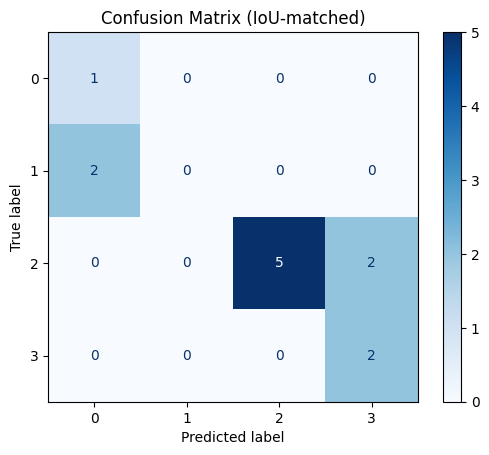

In [ ]:
#new function cause depth model uses png
def parse_yolo_label(label_path, image_w, image_h):
    """Parses a YOLO label file and returns boxes in [x1, y1, x2, y2] and class labels."""
    boxes = []
    classes = []
    with open(label_path, 'r') as f:
        for line in f:
            cls, x, y, w, h = map(float, line.strip().split())
            cx, cy, bw, bh = x*image_w, y*image_h, w*image_w, h*image_h
            x1 = cx - bw / 2
            y1 = cy - bh / 2
            x2 = cx + bw / 2
            y2 = cy + bh / 2
            boxes.append([x1, y1, x2, y2])
            classes.append(int(cls))
    return boxes, classes

y_true = []
y_pred = []

for r in depth_results:
    img_path = r.path
    label_path = img_path.replace('/images/', '/labels/').replace('.png', '.txt')
    img_w, img_h = Image.open(img_path).size

    gt_boxes, gt_classes = parse_yolo_label(label_path, img_w, img_h)

    pred_boxes = r.boxes.xyxy.cpu().numpy()
    pred_classes = r.boxes.cls.cpu().numpy().astype(int)

    matched_gt = set()

    for pb, pc in zip(pred_boxes, pred_classes):
        best_iou = 0
        best_gt_idx = -1
        for i, (gb, gc) in enumerate(zip(gt_boxes, gt_classes)):
            if i in matched_gt:
                continue
            iou = compute_iou(pb, gb)
            if iou > best_iou:
                best_iou = iou
                best_gt_idx = i
        if best_iou > 0.5:
            y_true.append(gt_classes[best_gt_idx])
            y_pred.append(pc)
            matched_gt.add(best_gt_idx)

# Now evaluate
cm = confusion_matrix(y_true, y_pred)
ConfusionMatrixDisplay(cm).plot(cmap='Blues')
plt.title("Confusion Matrix (IoU-matched)")
plt.show()